## About the Data
The data set comprises store attributes for BigMart, a grocery store chain with several stores in different cities.
- The data set was sourced by The Devastator(https://www.kaggle.com/thedevastator)
- The dataset was created by Zenodo(https://zenodo.org/records/6509955#.Y_q1CnbMKUl)
- The size of the data volume
>- **Amount of Item_Type:  16**
>- Type of Item_Type:  ['dairy' 'soft drinks' 'meat' 'fruits and vegetables' 'household'
 'baking goods' 'snack foods' 'frozen foods' 'breakfast'
 'health and hygiene' 'hard drinks' 'canned' 'breads' 'starchy foods' 'others' 'seafood']
>- **Amount of Item_Identifier:  1559**
>- Type of Item_Identifier:  ['fda15' 'drc01' 'fdn15' ... 'ncf55' 'ncw30' 'ncw05']
>- **Amount of Outlet_Identifier:  10**
>- Type of Outlet_Identifier:  ['out049' 'out018' 'out010' 'out013' 'out027' 'out045' 'out017' 'out046'
 'out035' 'out019']
>- **Amount of Outlet_Location_Type:  3**
>- Type of Outlet_Location_Type:  ['tier 1' 'tier 3' 'tier 2']

## The goal
1. **Show total sales in each outlet**
<br>
2. **Predict the sales of different item types in each outlet next time**<br>
step1. Using heat map to compare the proportion of the sales of different item type in each outlet.<br>
step2. Using pie chart to appear the proportion of the sales of different item type in each outlet.<br>
step3. Predict the sales of different item types in each outlet next time.<br>
step4. Using bar polt to appear the price by predicting  different item types in each outlet next time.
<br>
3. **Show total sales in each tier**
4. **Predict the sales of different item types in each tier(location) next time**<br>
5. **Analyzing sales in  different type of store**<br>
6. **Help the store owner to find the problems**

## Data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline

I change all the data to the upper case to use them easily and avoid problems. Besides, I remove duplicate data and handle outliers that delete some items whose weight is zero.

In [3]:
# Initially data
data_o = pd.read_csv('BigMart Product Sales Factors.csv')
data = data_o.applymap(lambda x: x.lower() if type(x) == str else x)
data.drop_duplicates(inplace=True)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,fda15,9.30,low fat,0.016047,dairy,249.8092,out049,1999,medium,tier 1,supermarket type1,3735.138000
1,drc01,5.92,regular,0.019278,soft drinks,48.2692,out018,2009,medium,tier 3,supermarket type2,443.422800
2,fdn15,17.50,low fat,0.016760,meat,141.6180,out049,1999,medium,tier 1,supermarket type1,2097.270000
3,fdx07,19.20,regular,0.000000,fruits and vegetables,182.0950,out010,1998,NaN,tier 3,grocery store,732.380000
4,ncd19,8.93,low fat,0.000000,household,53.8614,out013,1987,high,tier 3,supermarket type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,fdb58,10.50,regular,0.013496,snack foods,141.3154,out046,1997,small,tier 1,supermarket type1,2213.476465
14200,fdd47,7.60,regular,0.142991,starchy foods,169.1448,out018,2009,medium,tier 3,supermarket type2,2349.547110
14201,nco17,10.00,low fat,0.073529,health and hygiene,118.7440,out045,2002,NaN,tier 2,supermarket type1,1892.981544
14202,fdj26,15.30,regular,0.000000,canned,214.6218,out017,2007,NaN,tier 2,supermarket type1,4533.564958


In [3]:
# Item_Type
in_ItemType = data['Item_Type'].unique()

# Item_Identifier
in_ItemId = data['Item_Identifier'].unique()

# Outlet_Identifier
in_OutId = data['Outlet_Identifier'].unique()

# Outlet_Location_Type
in_LocId = data['Outlet_Location_Type'].unique()

print('Amount of Item_Type: ',len(in_ItemType))
print('Type of Item_Type: ',in_ItemType)
print()
print('Amount of Item_Identifier: ',len(in_ItemId))
print('Type of Item_Identifier: ',in_ItemId)
print()
print('Amount of Outlet_Identifier: ',len(in_OutId))
print('Type of Outlet_Identifier: ',in_OutId)
print()
print('Amount of Outlet_Location_Type: ',len(in_LocId))
print('Type of Outlet_Location_Type: ',in_LocId)

Amount of Item_Type:  16
Type of Item_Type:  ['dairy' 'soft drinks' 'meat' 'fruits and vegetables' 'household'
 'baking goods' 'snack foods' 'frozen foods' 'breakfast'
 'health and hygiene' 'hard drinks' 'canned' 'breads' 'starchy foods'
 'others' 'seafood']

Amount of Item_Identifier:  1559
Type of Item_Identifier:  ['fda15' 'drc01' 'fdn15' ... 'ncf55' 'ncw30' 'ncw05']

Amount of Outlet_Identifier:  10
Type of Outlet_Identifier:  ['out049' 'out018' 'out010' 'out013' 'out027' 'out045' 'out017' 'out046'
 'out035' 'out019']

Amount of Outlet_Location_Type:  3
Type of Outlet_Location_Type:  ['tier 1' 'tier 3' 'tier 2']


In [4]:
# clean data (Remove duplicate data and handle outliers)
df = data[data['Item_Weight']>0]

df.drop_duplicates(inplace=True)

df

/var/folders/hb/4s6bp6_s2018cs25zb9xhyvh0000gn/T/ipykernel_25319/3625065947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,fda15,9.30,low fat,0.016047,dairy,249.8092,out049,1999,medium,tier 1,supermarket type1,3735.138000
1,drc01,5.92,regular,0.019278,soft drinks,48.2692,out018,2009,medium,tier 3,supermarket type2,443.422800
2,fdn15,17.50,low fat,0.016760,meat,141.6180,out049,1999,medium,tier 1,supermarket type1,2097.270000
3,fdx07,19.20,regular,0.000000,fruits and vegetables,182.0950,out010,1998,NaN,tier 3,grocery store,732.380000
4,ncd19,8.93,low fat,0.000000,household,53.8614,out013,1987,high,tier 3,supermarket type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,fdb58,10.50,regular,0.013496,snack foods,141.3154,out046,1997,small,tier 1,supermarket type1,2213.476465
14200,fdd47,7.60,regular,0.142991,starchy foods,169.1448,out018,2009,medium,tier 3,supermarket type2,2349.547110
14201,nco17,10.00,low fat,0.073529,health and hygiene,118.7440,out045,2002,NaN,tier 2,supermarket type1,1892.981544
14202,fdj26,15.30,regular,0.000000,canned,214.6218,out017,2007,NaN,tier 2,supermarket type1,4533.564958


In [5]:
# Item_Type
l_ItemType = df['Item_Type'].unique()
l_ItemId = df['Item_Identifier'].unique()
l_OutId = df['Outlet_Identifier'].unique()
l_LocId = df['Outlet_Location_Type'].unique()

# Part 1

## 1. Show total sales in each outlet :
Outlet_Identifier ['out049' 'out018' 'out010' 'out013' 'out045' 'out017' 'out046' 'out035']

In [6]:
import matplotlib.pyplot as plt

sales_OutType = df.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Outlet_Sales'].sum().unstack()
sales_OutType = sales_OutType.round(2)

sales_OutType

Item_Type,baking goods,breads,breakfast,canned,dairy,frozen foods,fruits and vegetables,hard drinks,health and hygiene,household,meat,others,seafood,snack foods,soft drinks,starchy foods
Outlet_Identifier,,,,,,,,,,,,,,,,
out010,19271.94,12137.90,4862.20,18132.01,23488.33,29036.71,41030.43,6906.30,19231.72,37791.04,18988.85,5704.36,947.43,41884.79,14217.21,5392.72
out013,230800.51,98197.70,37961.44,254267.10,278823.61,326583.64,512402.17,86111.68,179864.00,391832.72,180291.97,62964.31,19738.01,516571.48,177682.67,64512.81
out017,244351.86,98804.94,37088.39,286936.78,294729.10,343615.43,517388.78,88750.12,190908.35,385156.31,182175.98,61718.22,18252.96,519184.39,177020.77,71459.04
out018,202836.35,93978.06,40354.78,217047.86,250559.56,279709.35,425698.66,72699.14,174049.78,340419.95,155783.69,57894.53,26284.63,434897.65,148743.00,58630.37
out035,237145.45,110667.94,50964.89,275668.12,300025.93,339241.08,511425.86,89893.70,211767.15,410985.92,184436.98,64816.57,30272.42,537471.06,167419.33,85042.29
out045,226197.28,94942.08,38509.46,254715.35,264319.44,305188.50,472593.65,82085.69,184729.07,365261.59,167194.83,63166.44,29927.93,454338.31,166534.28,72336.73
out046,260525.12,105335.23,41089.82,275747.66,272387.71,337365.84,483163.40,80282.52,209471.11,348570.04,168261.17,54709.52,32784.72,478926.72,148689.60,73498.86
out049,240503.33,102945.79,44551.99,250883.74,272845.73,331302.13,507008.92,88020.48,200108.16,430618.24,180005.64,71869.14,18312.45,514414.52,171728.13,70509.54


Outlet_Identifier
out010     299023.93
out013    3418605.83
out017    3517541.40
out018    2979587.36
out035    3607244.69
out045    3242040.65
out046    3370809.03
out049    3495627.93
Name: Item_Outlet_Sales, dtype: float64


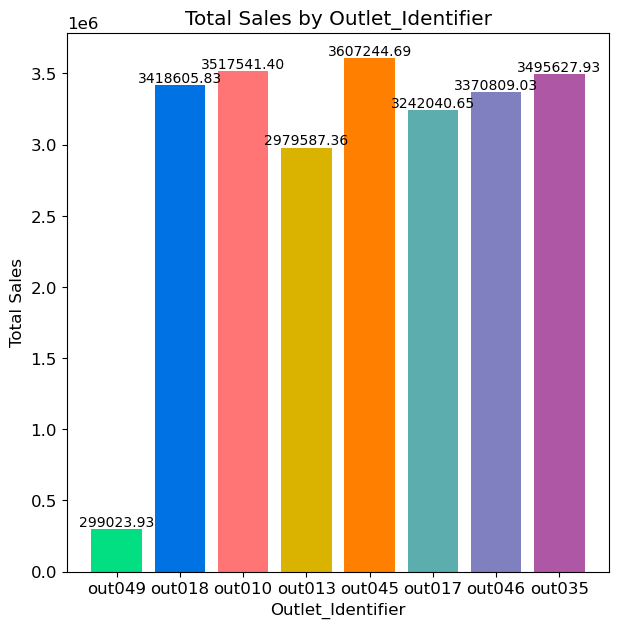

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=[7,7]
plt.rcParams['font.size'] = 12

out_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum()
out_sales = out_sales.round(2)
print(out_sales)

plt.bar(l_OutId, out_sales, color=['#02DF82', '#0072E3', '#FF7575','#D9B300','#FF8000','#5CADAD','#8080C0','#AE57A4'])

for i, v in enumerate(out_sales):
    plt.text(i, v + 50, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Sales by Outlet_Identifier')
plt.xlabel('Outlet_Identifier')
plt.ylabel('Total Sales')
plt.show()

## 2. Predict the sales of different item types in each outlet next time

In [8]:
# Each store has a different Item_Type, and the Sales of each Item_Type are also different
df_sort_IdItemType = df.sort_values(by=['Outlet_Identifier', 'Item_Type'])
df_sort_IdItemType

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
205,fdf24,15.500,regular,0.042465,baking goods,81.5934,out010,1998,NaN,tier 3,grocery store,327.573600
836,fdl48,19.350,regular,0.137697,baking goods,47.1034,out010,1998,NaN,tier 3,grocery store,145.810200
953,fdz23,17.750,regular,0.112986,baking goods,185.4240,out010,1998,NaN,tier 3,grocery store,745.696000
1259,fdu60,20.000,regular,0.100262,baking goods,169.6132,out010,1998,NaN,tier 3,grocery store,169.113200
1291,fdy24,4.880,regular,0.223440,baking goods,52.2298,out010,1998,NaN,tier 3,grocery store,161.789400
...,...,...,...,...,...,...,...,...,...,...,...,...
12935,fdc23,18.000,low fat,0.017934,starchy foods,175.7686,out049,1999,medium,tier 1,supermarket type1,2537.231395
12957,fdz34,6.695,low fat,0.075996,starchy foods,194.1820,out049,1999,medium,tier 1,supermarket type1,2853.374762
13011,fdb23,19.200,regular,0.005597,starchy foods,224.8062,out049,1999,medium,tier 1,supermarket type1,4016.120200
13995,fdg59,15.850,low fat,0.043302,starchy foods,36.9164,out049,1999,medium,tier 1,supermarket type1,577.799661


### step1. Using heat map to compare the proportion of the sales of different item type in each outlet.

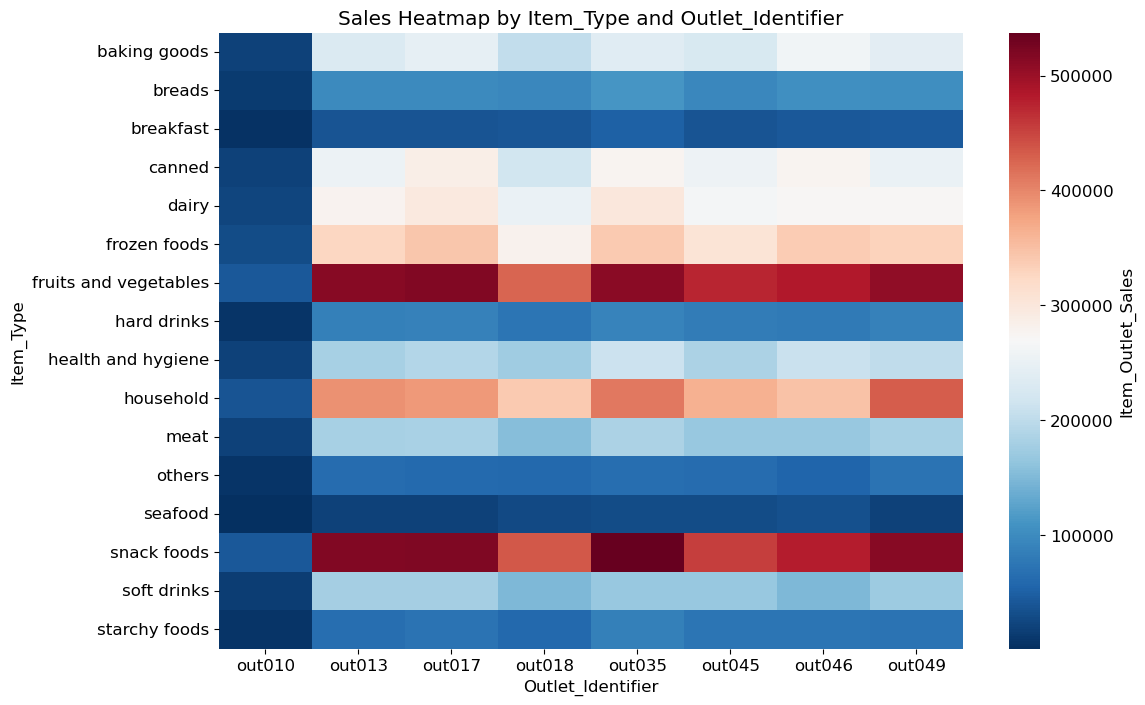

In [9]:
hm_data = df.pivot_table(index='Item_Type', columns='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc='sum')

plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12

sns.heatmap(hm_data, cmap='RdBu_r', cbar_kws={'label': 'Item_Outlet_Sales'})
plt.title('Sales Heatmap by Item_Type and Outlet_Identifier')
plt.show()

### step2. Using pie chart to appear the proportion of the sales of different item type in each outlet.

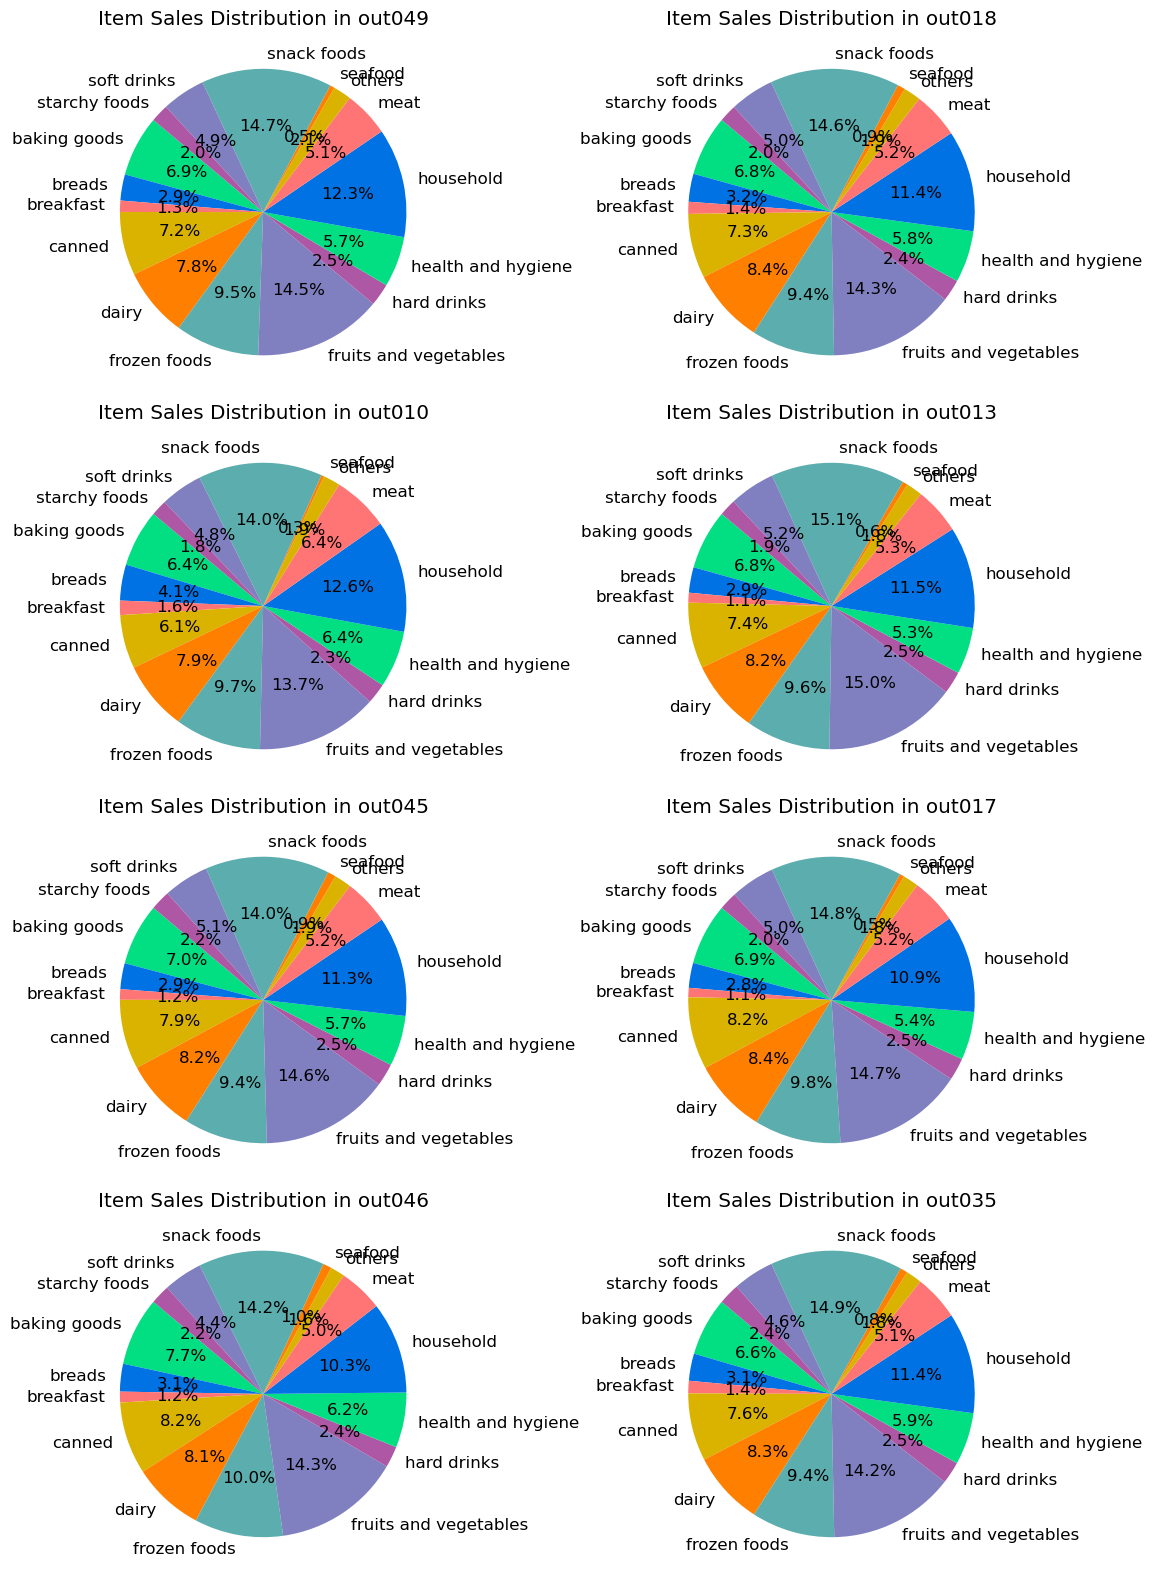

In [10]:
plt.rcParams['figure.figsize'] = [14, 20]
plt.rcParams['font.size'] = 12

# The sum of sales of different item type in each outlet
Sales_OutType = df.groupby(['Outlet_Identifier', 'Item_Type'])['Item_Outlet_Sales'].sum().unstack()

fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for i, l in enumerate(l_OutId):
    row, col = divmod(i, 2)
    out_data = Sales_OutType.loc[l]

    axes[row, col].pie(out_data, labels=out_data.index, autopct='%1.1f%%', startangle=140, colors=['#02DF82', '#0072E3', '#FF7575', '#D9B300', '#FF8000', '#5CADAD', '#8080C0', '#AE57A4'])
    axes[row, col].set_title(f'Item Sales Distribution in {l}')

plt.show()

It shows the value of different item type in each outlet.

In [11]:
Sales_OutType

Item_Type,baking goods,breads,breakfast,canned,dairy,frozen foods,fruits and vegetables,hard drinks,health and hygiene,household,meat,others,seafood,snack foods,soft drinks,starchy foods
Outlet_Identifier,,,,,,,,,,,,,,,,
out010,19271.940796,12137.901694,4862.196045,18132.007401,23488.328537,29036.710969,41030.432177,6906.297632,19231.715408,37791.039700,18988.853036,5704.358124,947.433400,41884.789176,14217.209692,5392.717954
out013,230800.511394,98197.699140,37961.439126,254267.100817,278823.613730,326583.639387,512402.167779,86111.683520,179864.004938,391832.716915,180291.971869,62964.312423,19738.011846,516571.484076,177682.668498,64512.808211
out017,244351.860565,98804.940576,37088.389148,286936.778769,294729.104350,343615.426801,517388.778813,88750.117441,190908.346050,385156.306015,182175.983491,61718.221229,18252.958034,519184.388284,177020.767565,71459.036662
out018,202836.348518,93978.058962,40354.784605,217047.857265,250559.564053,279709.347617,425698.659793,72699.141651,174049.784406,340419.948087,155783.686449,57894.533966,26284.627333,434897.645392,148743.004166,58630.365969
out035,237145.446385,110667.940251,50964.894642,275668.120458,300025.933311,339241.077406,511425.859392,89893.700538,211767.152060,410985.918985,184436.975406,64816.574828,30272.419264,537471.059010,167419.326311,85042.290611
out045,226197.275822,94942.080086,38509.456776,254715.350811,264319.443912,305188.502117,472593.652939,82085.691609,184729.073900,365261.591680,167194.826990,63166.443518,29927.934716,454338.308410,166534.283713,72336.731070
out046,260525.118576,105335.233439,41089.815252,275747.655531,272387.714467,337365.843360,483163.397669,80282.516086,209471.110464,348570.038692,168261.172508,54709.522382,32784.719488,478926.715169,148689.601415,73498.856529
out049,240503.330383,102945.789951,44551.993178,250883.737958,272845.729236,331302.131116,507008.921889,88020.476833,200108.157003,430618.243620,180005.640080,71869.136162,18312.453994,514414.515796,171728.131097,70509.540646


### step3. Predict the sales of different item types in each outlet next time.
Predict Sales between Outlet_Identifier and Item_Type by K-Nearest Neighbors Algorithm (KNN).

In [12]:
X_1 = pd.get_dummies(df_sort_IdItemType[['Outlet_Identifier', 'Item_Type']], columns=['Outlet_Identifier', 'Item_Type'])
Y_1 = df_sort_IdItemType['Item_Outlet_Sales']

# Split data to training and test set
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y_1, test_size=0.4, random_state=42)

# Remove features which don't match the training set or the test set
extraFeatureTrain = set(X_train_1.columns) - set(X_test_1.columns)
extraFeatureTest = set(X_test_1.columns) - set(X_train_1.columns)
X_train_1 = X_train_1.drop(columns=extraFeatureTrain)
X_test_1 = X_test_1.drop(columns=extraFeatureTest)

# Build KNN regressor model
knnRModel = KNeighborsRegressor(n_neighbors=5)

knnRModel.fit(X_train_1, Y_train_1)

Y_pred_1 = knnRModel.predict(X_test_1)
Y_pred_1

array([1845.48916419, 1316.76055691, 1776.13885238, ..., 2625.35463126,
       2152.23259424, 1845.48916419])

In [13]:
# Predicted results and actual values
result = pd.concat([pd.Series(Y_test_1.values, name='Actual'), pd.Series(Y_pred_1, name='Predicted')], axis=1)
result

,Actual,Predicted
0,1470.086400,1845.489164
1,1518.024000,1316.760557
2,941.594464,1776.138852
3,1707.777000,3204.866246
4,1034.653200,2267.054785
...,...,...
4701,76.943547,447.683920
4702,3179.541544,2193.223974
4703,3034.050600,2625.354631
4704,1378.206000,2152.232594


In [14]:
mse = mean_squared_error(Y_test_1, Y_pred_1)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_1, Y_pred_1)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 1903624.7406502033
Root Mean Squared Error (RMSE): 1379.7190803385315
Mean Absolute Error (MAE): 1043.188928235311


In [15]:
# Feature is "Outlet_Identifier" and "Item_Type" and the goal is "Item_Outlet_Sales"
X_1 = df[['Outlet_Identifier', 'Item_Type']]
Y_1 = df['Item_Outlet_Sales']

X_encoded = pd.get_dummies(X_1, columns=['Outlet_Identifier', 'Item_Type'])

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_encoded, Y_1, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)
X_test_scaled = scaler.transform(X_test_1)

knnRegressor = KNeighborsRegressor(n_neighbors=5)
knnRegressor.fit(X_train_scaled, Y_train_1)

Y_pred_1 = knnRegressor.predict(X_test_scaled)

mse = mean_squared_error(Y_test_1, Y_pred_1)
# print(f'Mean Squared Error: {mse}')

In [16]:
p_data1 = pd.DataFrame(index=pd.MultiIndex.from_product([l_OutId, l_ItemType], names=['Outlet_Identifier', 'Item_Type']))

p_data_encoded_1 = pd.get_dummies(p_data1.reset_index(), columns=[ 'Item_Type','Outlet_Identifier'])


common_features_1 = list(set(X_train_1.columns) & set(p_data_encoded_1.columns))
p_data_encoded_1 = p_data_encoded_1[common_features_1]

p_sales = knnRegressor.predict(p_data_encoded_1)

p_data1['Predicted_Sales'] = p_sales
#p_data

/Users/seanmacbook/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [17]:
p_sales_df = pd.DataFrame(p_sales, columns=['Predicted_Sales'])

result_df = pd.concat([p_data1.reset_index()], axis=1)
result_df

,Outlet_Identifier,Item_Type,Predicted_Sales
0,out049,dairy,2205.381750
1,out049,soft drinks,1510.015594
2,out049,meat,2205.381750
3,out049,fruits and vegetables,2205.381750
4,out049,household,689.142823
...,...,...,...
123,out035,breads,2111.675016
124,out035,canned,2101.537456
125,out035,starchy foods,2488.587201
126,out035,others,2488.587201


### step4. Using bar chart to appear the predicted price of different item types in each outlet next time.

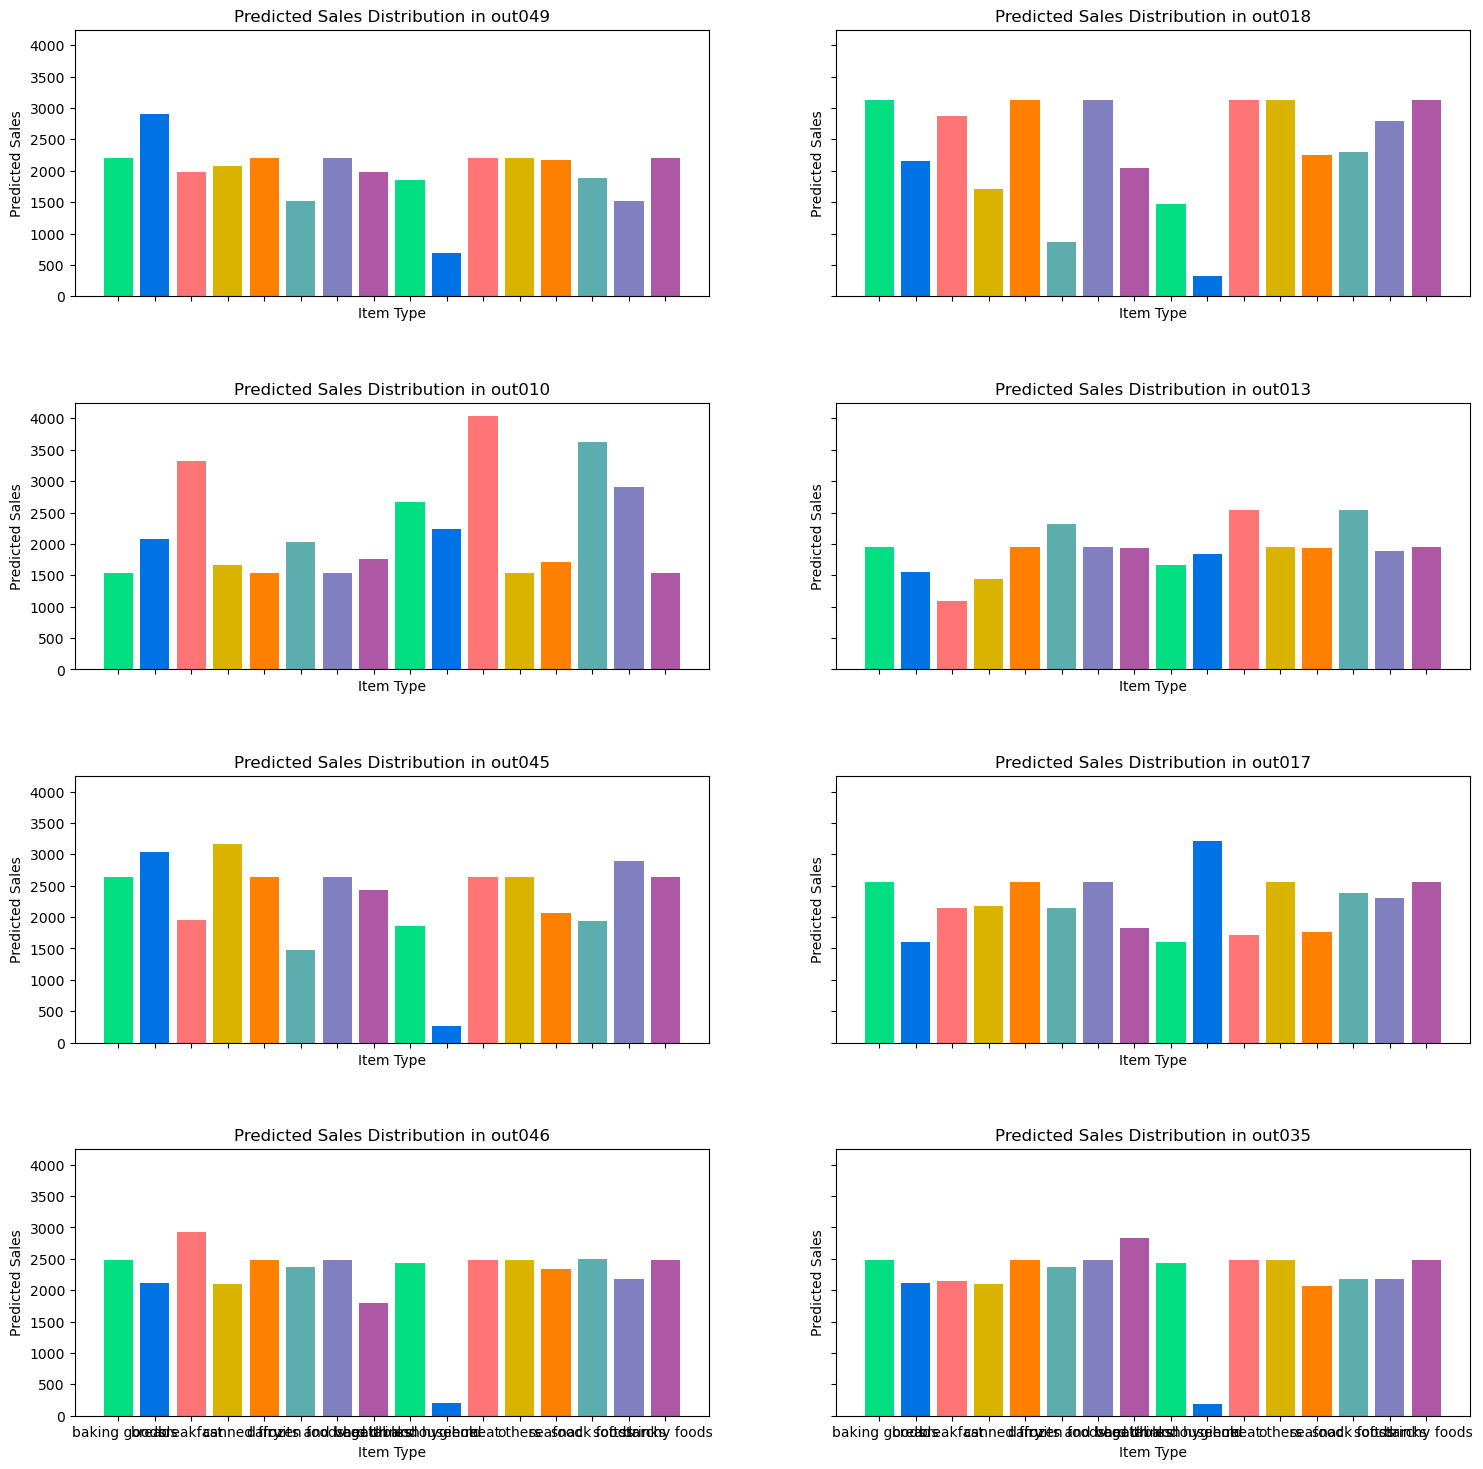

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [18, 18]
plt.rcParams['font.size'] = 10

#out_labels = ['out010', 'out013', 'out017', 'out018', 'out035', 'out045', 'out046', 'out049']

# Total sales of different item types in each outlet
result_df1 = p_data1.groupby(['Outlet_Identifier', 'Item_Type'])['Predicted_Sales'].sum().unstack()

fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.4, 'wspace': 0.2})

colors = ['#02DF82', '#0072E3', '#FF7575', '#D9B300', '#FF8000', '#5CADAD', '#8080C0', '#AE57A4']

for i, l in enumerate(l_OutId):
    row, col = divmod(i, 2)
    out_data = result_df1.loc[l]

    axes[row, col].bar(out_data.index.get_level_values('Item_Type'), out_data.values, color=colors)
    axes[row, col].set_title(f'Predicted Sales Distribution in {l}')
    axes[row, col].set_xlabel('Item Type')
    axes[row, col].set_ylabel('Predicted Sales')

plt.show()


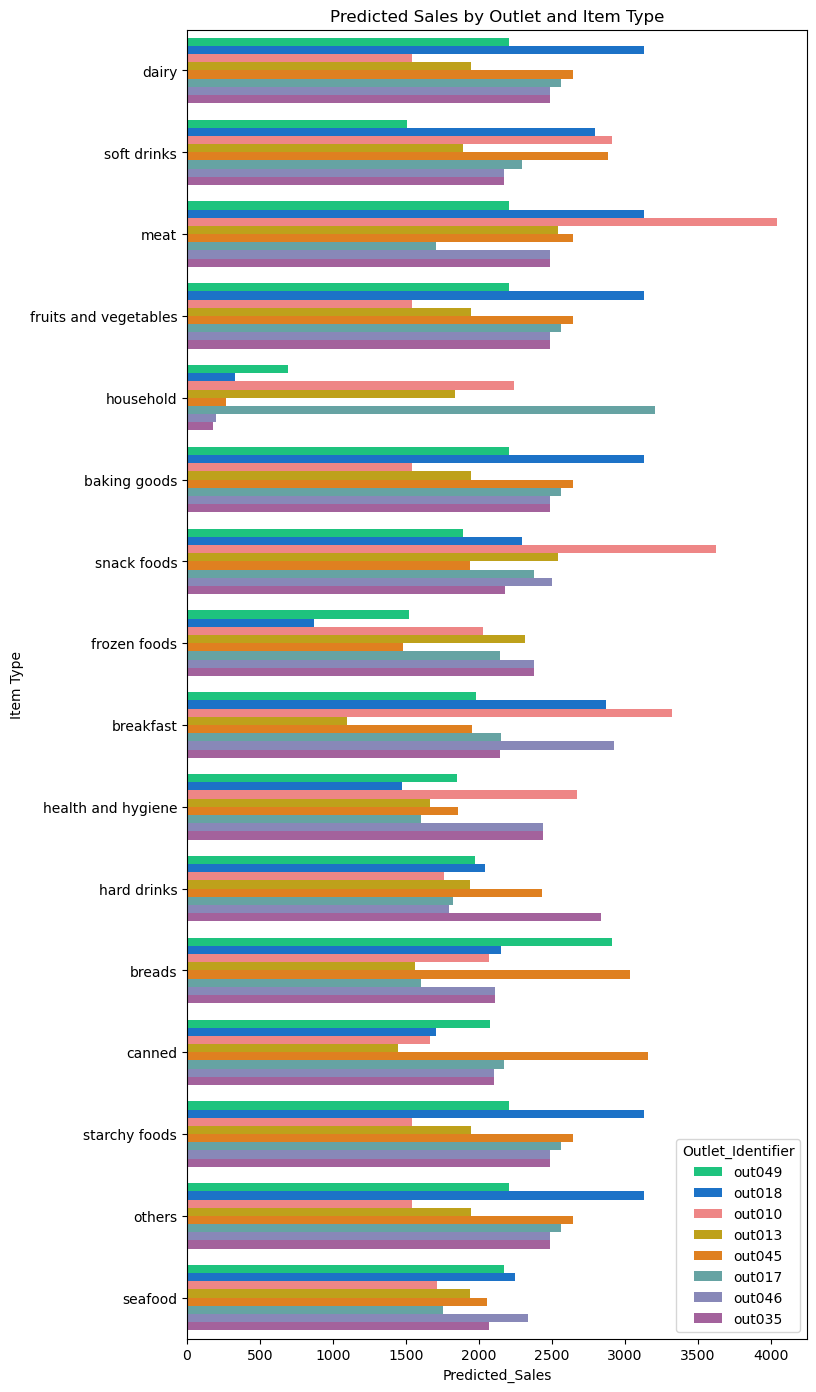

In [19]:
colors = ['#02DF82', '#0072E3', '#FF7575', '#D9B300', '#FF8000', '#5CADAD', '#8080C0', '#AE57A4']

plt.figure(figsize=(8, 17))
sns.barplot(x='Predicted_Sales', y='Item_Type', hue='Outlet_Identifier', data=result_df, palette=colors)
plt.title('Predicted Sales by Outlet and Item Type')
plt.xlabel('Predicted_Sales')
plt.ylabel('Item Type')
plt.show()

# 3. Total sales in each tier

In [20]:
# Total sales in each tier
tier_sales = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()
tier_sales = tier_sales.round(2)
tier_sales

Outlet_Location_Type
tier 1     6866436.96
tier 2    10366826.74
tier 3     6697217.12
Name: Item_Outlet_Sales, dtype: float64

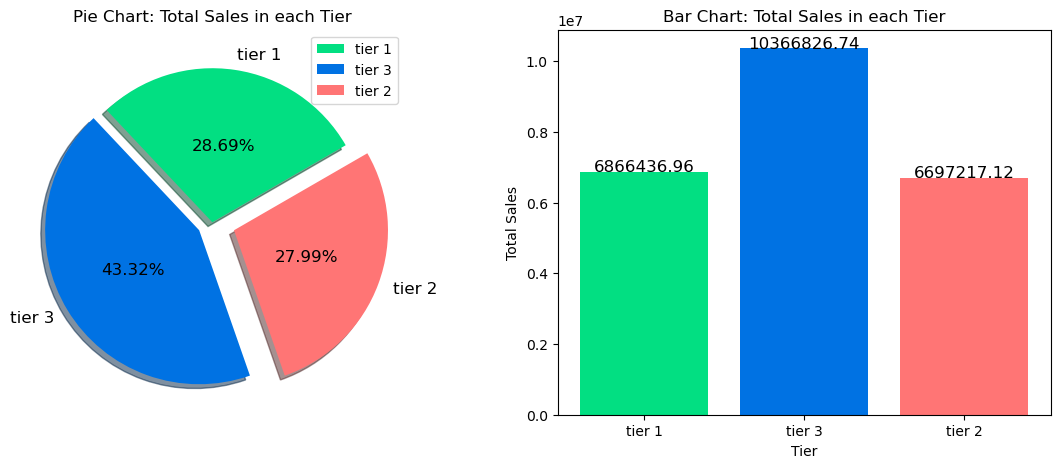

In [21]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 5]

colors =['#02DF82', '#0072E3', '#FF7575']

# pie chart
plt.subplot(1, 2, 1)
explode = (0, 0.1, 0.15)

plt.pie(tier_sales, colors=colors, labels=l_LocId, textprops={'fontsize': 12, 'color': 'black'},
        explode=explode, shadow=True, startangle=30, autopct="%0.2f%%", pctdistance=0.5)
plt.title('Pie Chart: Total Sales in each Tier')
plt.legend()

# bar chart
plt.subplot(1, 2, 2)
plt.bar(l_LocId, tier_sales, color=colors)
for i, v in enumerate(tier_sales):
    plt.text(i, v + 50, f'{v:.2f}', ha='center', fontsize=12)
plt.title('Bar Chart: Total Sales in each Tier')
plt.xlabel('Tier')
plt.ylabel('Total Sales')

plt.show()

It shows that the total sale of Tier 3 is obviously higher than Tier 1 and Tier 2.
If BigMart, the company, would like to invest other businesses, our suggesation is to set up more stores in Tier 3. 

# 4. Predict the sales of different item types in each tier(location) next time

In [22]:
# Sort by tier and item type
df_sort_LocItemType = df.sort_values(by=['Outlet_Location_Type', 'Item_Type'])
df_sort_LocItemType

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
48,fdl12,15.850,regular,0.121633,baking goods,60.6220,out046,1997,small,tier 1,supermarket type1,2576.646000
220,fdy24,4.880,regular,0.133701,baking goods,52.9298,out049,1999,medium,tier 1,supermarket type1,1995.402600
295,fdy59,8.195,low fat,0.031452,baking goods,94.3462,out049,1999,medium,tier 1,supermarket type1,925.462000
299,fdu36,6.150,low fat,0.046271,baking goods,99.3384,out046,1997,small,tier 1,supermarket type1,2364.921600
308,fdx23,6.445,low fat,0.029692,baking goods,92.6436,out046,1997,small,tier 1,supermarket type1,1039.979600
...,...,...,...,...,...,...,...,...,...,...,...,...
13939,fde35,7.060,regular,0.000000,starchy foods,58.2904,out018,2009,medium,tier 3,supermarket type2,464.202391
13980,fdf47,20.850,low fat,0.098016,starchy foods,223.6746,out018,2009,medium,tier 3,supermarket type2,4375.017257
14016,fdf11,10.195,regular,0.029511,starchy foods,239.6538,out010,1998,NaN,tier 3,grocery store,493.686266
14174,fdd23,9.500,regular,0.048645,starchy foods,186.1898,out013,1987,high,tier 3,supermarket type1,2688.702332


In [23]:
#Total sales of different item type in each tier(location).
import matplotlib.pyplot as plt

sales_TierType = df.groupby(['Outlet_Location_Type', 'Item_Type'])['Item_Outlet_Sales'].sum().unstack()
sales_TierType = sales_TierType.round(2)

sales_TierType

Item_Type,baking goods,breads,breakfast,canned,dairy,frozen foods,fruits and vegetables,hard drinks,health and hygiene,household,meat,others,seafood,snack foods,soft drinks,starchy foods
Outlet_Location_Type,,,,,,,,,,,,,,,,
tier 1,501028.45,208281.02,85641.81,526631.39,545233.44,668667.97,990172.32,168302.99,409579.27,779188.28,348266.81,126578.66,51097.17,993341.23,320417.73,144008.40
tier 2,707694.58,304414.96,126562.74,817320.25,859074.48,988045.01,1501408.29,260729.51,587404.57,1161403.82,533807.79,189701.24,78453.31,1510993.76,510974.38,228838.06
tier 3,452908.80,204313.66,83178.42,489446.97,552871.51,635329.70,979131.26,165717.12,373145.50,770043.70,355064.51,126563.20,46970.07,993353.92,340642.88,128535.89


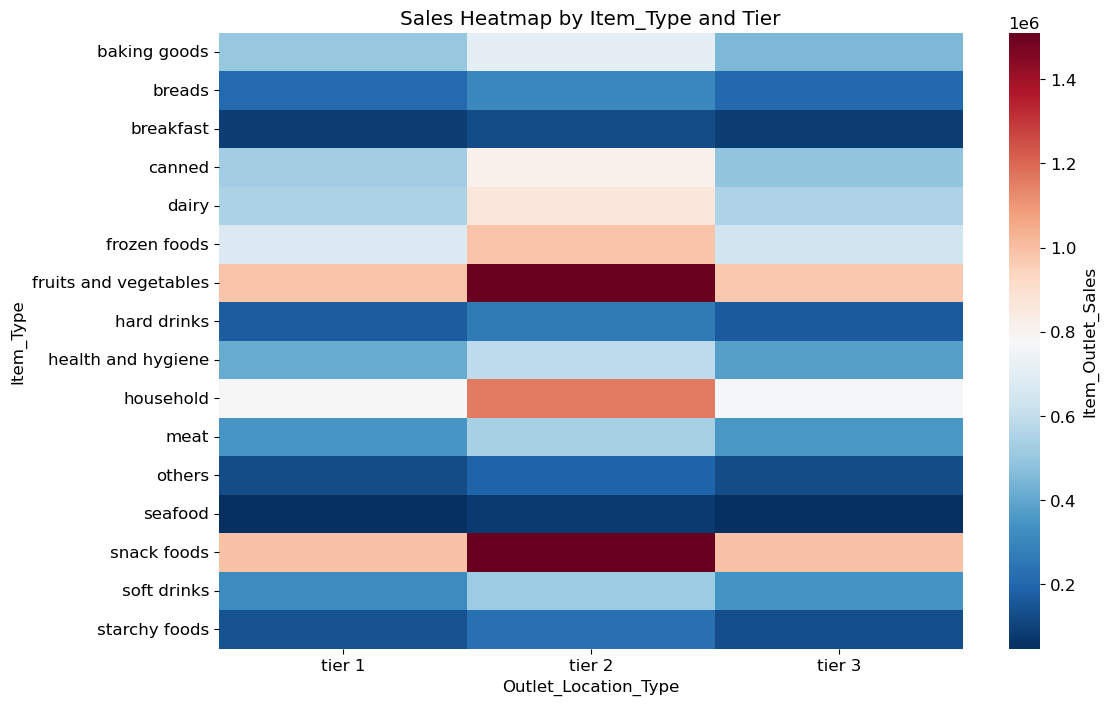

In [24]:
# Heatmap of different item type in each tier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.pivot_table(index='Item_Type', columns='Outlet_Location_Type', values='Item_Outlet_Sales', aggfunc='sum')

plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12

sns.heatmap(heatmap_data, cmap='RdBu_r', cbar_kws={'label': 'Item_Outlet_Sales'})
plt.title('Sales Heatmap by Item_Type and Tier')
plt.show()

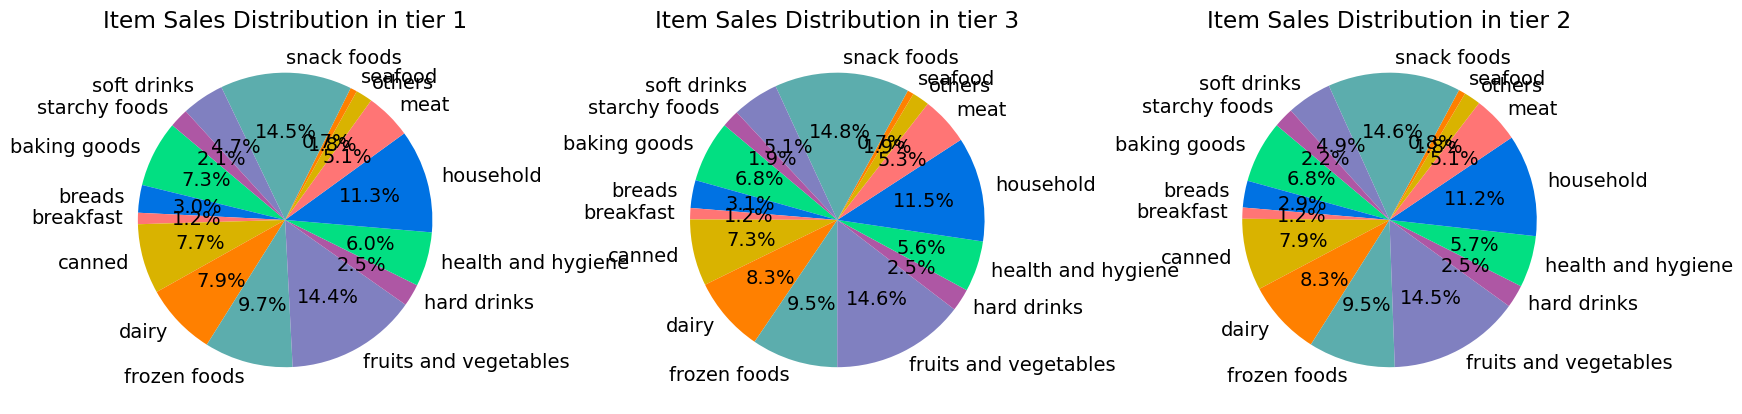

In [25]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [19, 19]
plt.rcParams['font.size'] = 14

# Total sales of different item type in each tier
sales_TierItemType = df.groupby(['Outlet_Location_Type', 'Item_Type'])['Item_Outlet_Sales'].sum().unstack()

fig, axes = plt.subplots(1, 3)

colors = ['#02DF82', '#0072E3', '#FF7575', '#D9B300', '#FF8000', '#5CADAD', '#8080C0', '#AE57A4']

for i, tier in enumerate(l_LocId):
    tier_data = sales_TierItemType.loc[tier]

    axes[i].pie(tier_data, labels=tier_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f'Item Sales Distribution in {tier}')

plt.subplots_adjust(wspace=0.5)

plt.show()


In [26]:
X_4 = pd.get_dummies(df_sort_LocItemType[['Outlet_Location_Type', 'Item_Type']], columns=['Outlet_Location_Type', 'Item_Type'])
Y_4 = df_sort_LocItemType['Item_Outlet_Sales']

# Split training set and test set
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X_4, Y_4, test_size=0.3, random_state=42)

# Remove features that do not match between the training set and the test set
extra_FeatureTrain_4 = set(X_train_4.columns) - set(X_test_4.columns)
extra_FeatureTest_4 = set(X_test_4.columns) - set(X_train_4.columns)
X_train_4 = X_train_4.drop(columns=extra_FeatureTrain_4)
X_test_4 = X_test_4.drop(columns=extra_FeatureTest_4)

# Build KNN regressor model
knnModel = KNeighborsRegressor(n_neighbors=5)

knnModel.fit(X_train_4, Y_train_4)

Y_pred_4 = knnModel.predict(X_test_4)
Y_pred_4


array([1976.34345809, 1826.82445627, 2046.69090967, ..., 1976.34345809,
        918.30398318, 1662.67576704])

In [27]:
# Predicted results and actual values
result_df_LocItemType = pd.concat([pd.Series(Y_test_4.values, name='Actual'), pd.Series(Y_pred_4, name='Predicted')], axis=1)
result_df_LocItemType

,Actual,Predicted
0,627.740946,1976.343458
1,115.183400,1826.824456
2,1973.431200,2046.690910
3,211.448001,901.945689
4,3335.901573,3002.267647
...,...,...
3525,2628.578400,1510.966520
3526,775.493297,1906.367416
3527,3349.127849,1976.343458
3528,3323.007800,918.303983


In [28]:
# Feature Outlet_Identifier and Item_Type and the goal is Item_Outlet_Sales
X_4 = df[['Outlet_Location_Type', 'Item_Type']]
y_4 = df['Item_Outlet_Sales']

X_encoded = pd.get_dummies(X_4, columns=['Outlet_Location_Type', 'Item_Type'])

scaler = StandardScaler()
X_train_scaled_4 = scaler.fit_transform(X_train_4)
X_test_scaled_4 = scaler.transform(X_test_4)

knn_regressor_4 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_4.fit(X_train_scaled_4, Y_train_4)

Y_pred_4 = knn_regressor_4.predict(X_test_scaled_4)

mse = mean_squared_error(Y_test_4, Y_pred_4)
#print(f'Mean Squared Error: {mse}')
Y_pred_4


array([2157.42301714,  354.57523777, 1894.07749583, ..., 2157.42301714,
        932.10672088, 1163.43537482])

In [29]:
p_data_Location_4 = pd.DataFrame(index=pd.MultiIndex.from_product([l_LocId, l_ItemType], names=['Outlet_Location_Type', 'Item_Type']))

p_data_encoded_4 = pd.get_dummies(p_data_Location_4.reset_index(), columns=[ 'Item_Type','Outlet_Location_Type'])

common_features_4 = list(set(X_train_4.columns) & set(p_data_encoded_4.columns))

# Ensure that only the columns used during the training phase are used for prediction
p_data_encoded_4 = p_data_encoded_4.reindex(columns=X_train_4.columns, fill_value=0)

# Make predictions
p_sales_Location = knnModel.predict(p_data_encoded_4)

# Add predictions to the DataFrame
p_data_Location_4['Predicted_Sales'] = p_sales_Location

p_data_Location_4

Predicted_Sales
Outlet_Location_Type Item_Type                             
tier 1               dairy                      2671.107541
                     soft drinks                1845.166067
                     meat                       1662.675767
                     fruits and vegetables      1528.331361
                     household                  2046.690910
                     baking goods               2436.319556
                     snack foods                1906.367416
                     frozen foods               2375.441240
                     breakfast                  2661.541817
                     health and hygiene         2669.006835
                     hard drinks                3139.959746
                     breads                     1769.928061
                     canned                     1943.363340
                     starchy foods              2613.408472
                     others                     1383.173373
                     seafood                    3129.126840
tier 3               dairy                       468.724288
                     soft drinks                 447.190217
                     meat                       1275.195361
                     fruits and vegetables       918.303983
                     household                  2862.501274
                     baking goods               1291.995452
                     snack foods                1510.966520
                     frozen foods               1208.038369
                     breakfast                  1547.682212
                     health and hygiene         1741.732800
                     hard drinks                1826.824456
                     breads                     1499.890279
                     canned                      901.945689
                     starchy foods              1713.732143
                     others                     1847.942275
                     seafood                     659.008840
tier 2               dairy                      2227.367320
                     soft drinks                1458.790699
                     meat                       1068.306641
                     fruits and vegetables      1889.708312
                     household                  3500.860374
                     baking goods               2458.338642
                     snack foods                2052.137526
                     frozen foods               1976.343458
                     breakfast                  1799.391080
                     health and hygiene         2504.857727
                     hard drinks                2961.366508
                     breads                     3220.794673
                     canned                     3002.267647
                     starchy foods              1784.486256
                     others                     2186.003214
                     seafood                    2959.752007

p_data_Location_4 = pd.DataFrame(index=pd.MultiIndex.from_product([l_LocId, l_ItemType], names=['Outlet_Location_Type', 'Item_Type']))

p_data_encoded_4 = pd.get_dummies(p_data_Location_4.reset_index(), columns=[ 'Item_Type','Outlet_Location_Type'])

common_features_4 = list(set(X_train_4.columns) & set(p_data_encoded_4.columns))

p_data_encoded_4 = p_data_encoded_4[common_features_4]

p_sales_Location = knnModel.predict(p_data_encoded_4)

p_data_Location_4['Predicted_Sales'] = p_sales_Location

p_data_Location_4

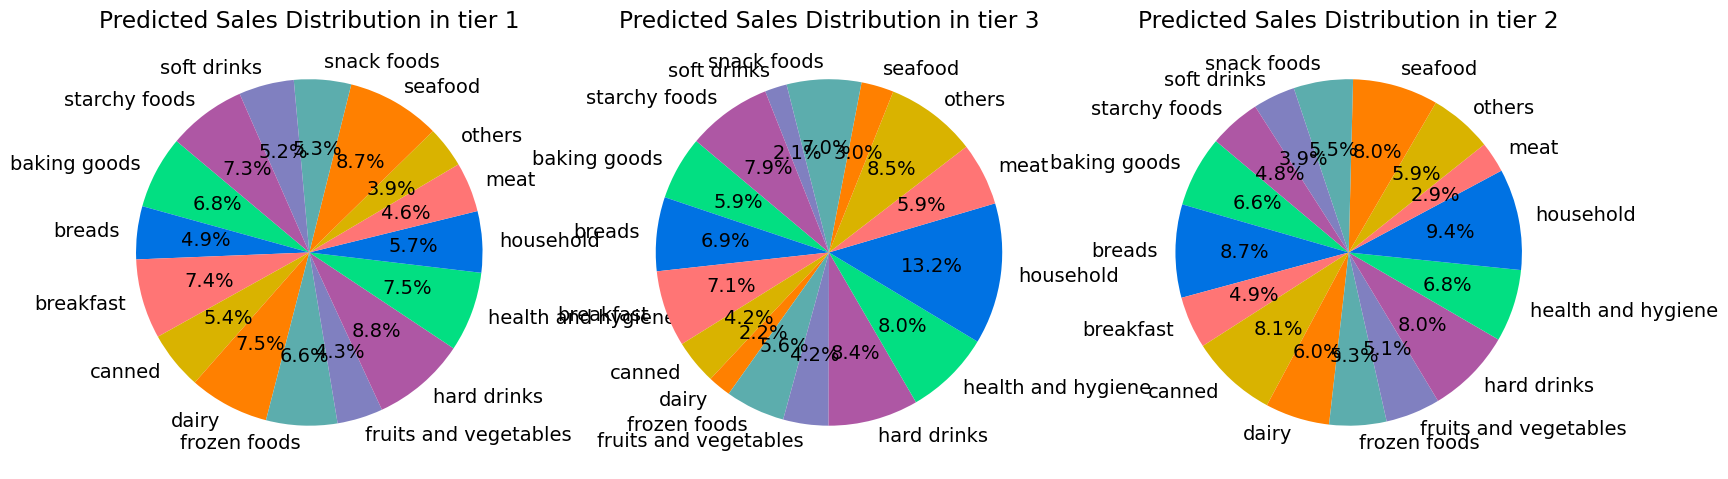

In [30]:
plt.rcParams['figure.figsize'] = [19, 19]
plt.rcParams['font.size'] = 14

result_df2 = p_data_Location_4.groupby(['Outlet_Location_Type', 'Item_Type'])['Predicted_Sales'].sum().unstack()

fig, axes = plt.subplots(1,3)

colors = ['#02DF82', '#0072E3', '#FF7575', '#D9B300', '#FF8000', '#5CADAD', '#8080C0', '#AE57A4']

for i, l in enumerate(l_LocId):
    Location_data = result_df2.loc[l]

    axes[i].pie(Location_data, labels=Location_data.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f'Predicted Sales Distribution in {l}')

plt.show()

## Part 2
## Analyzing sales in  different type of store

Import Data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('BigMart Product Sales Factors.csv')
df = df.drop_duplicates()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Data Cleaning

In [35]:
# Using mean to fill NA in Item_weight
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())
# Using mean to fill Medium in = Outlet_size
df.Outlet_Size.unique()
df.Outlet_Size = df.Outlet_Size.fillna("Medium")

### Data Visualization

###  Correlation
Outlet Sales and MRP have higher correlation

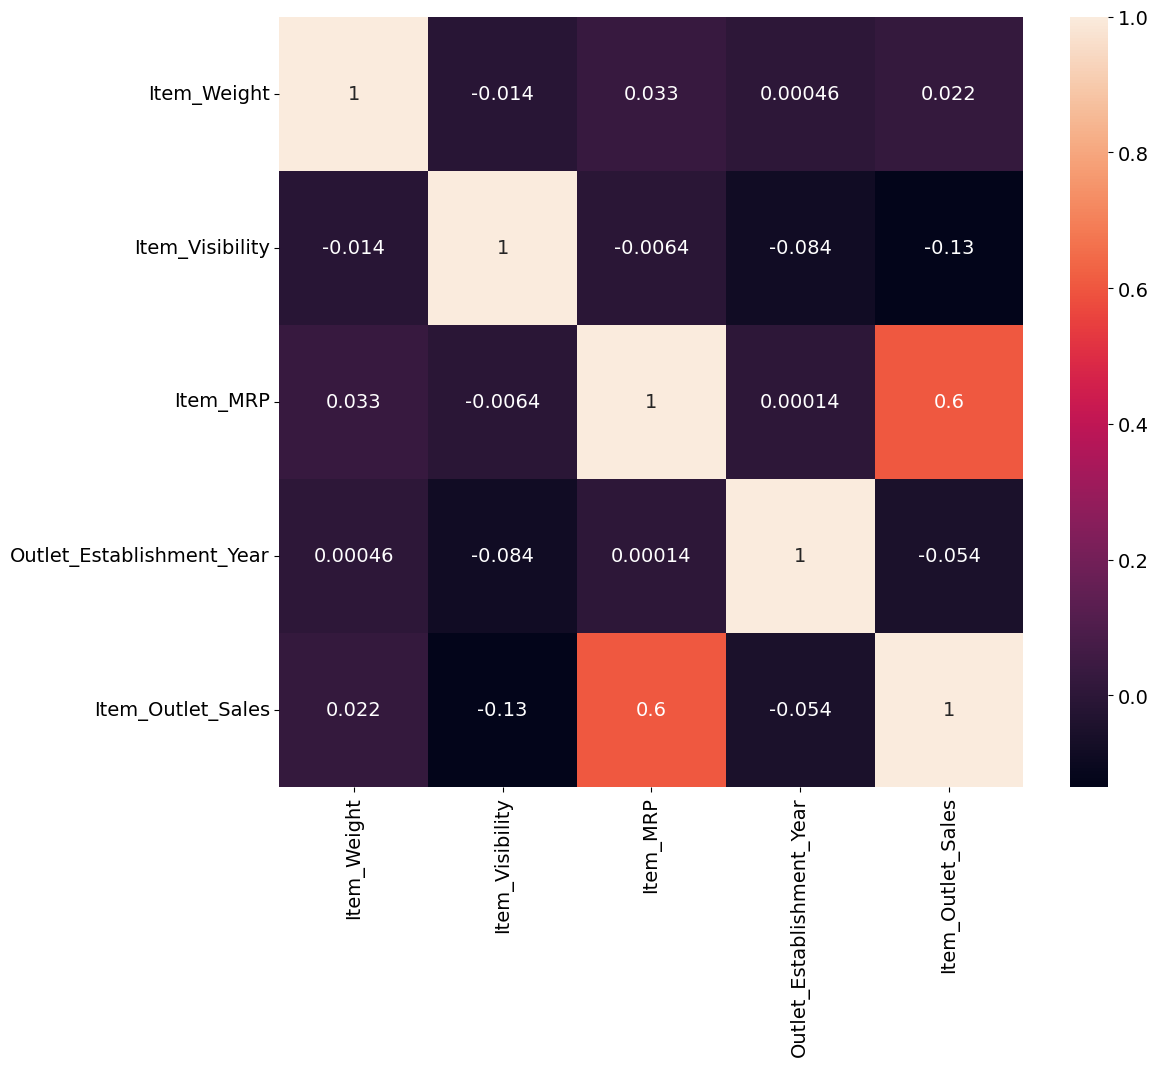

In [36]:
numeric_columns = df.select_dtypes(include=[np.number])

# Use heatmap to show the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()

Scatter plot for Item_Outlet_Sales and Item_MRP

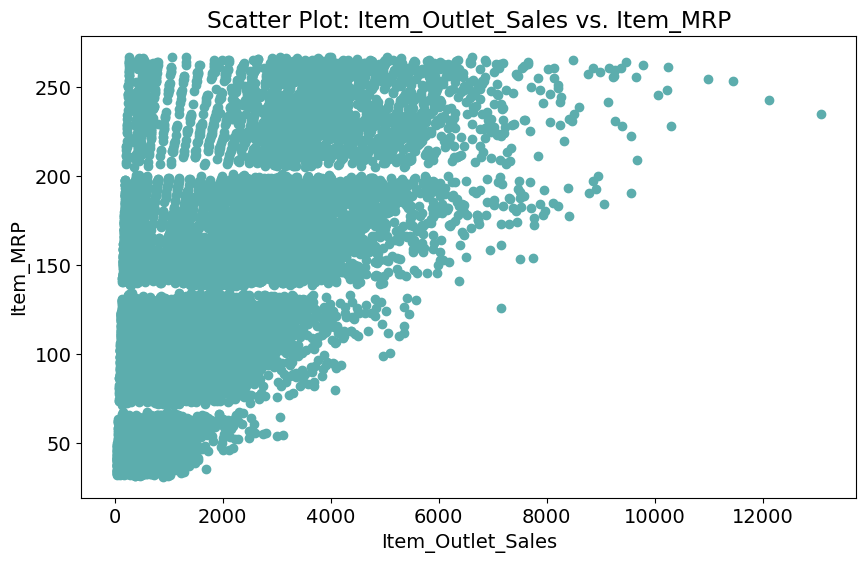

In [37]:
plt.figure(figsize=(10, 6))
colors = ['#02DF82', '#0072E3', '#FF7575', '#D9B300', '#FF8000', '#5CADAD', '#8080C0', '#AE57A4']


plt.scatter(df['Item_Outlet_Sales'], df['Item_MRP'], color='#5CADAD')

plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Item_MRP')
plt.title('Scatter Plot: Item_Outlet_Sales vs. Item_MRP')

plt.show()

Different item sales in different type of store

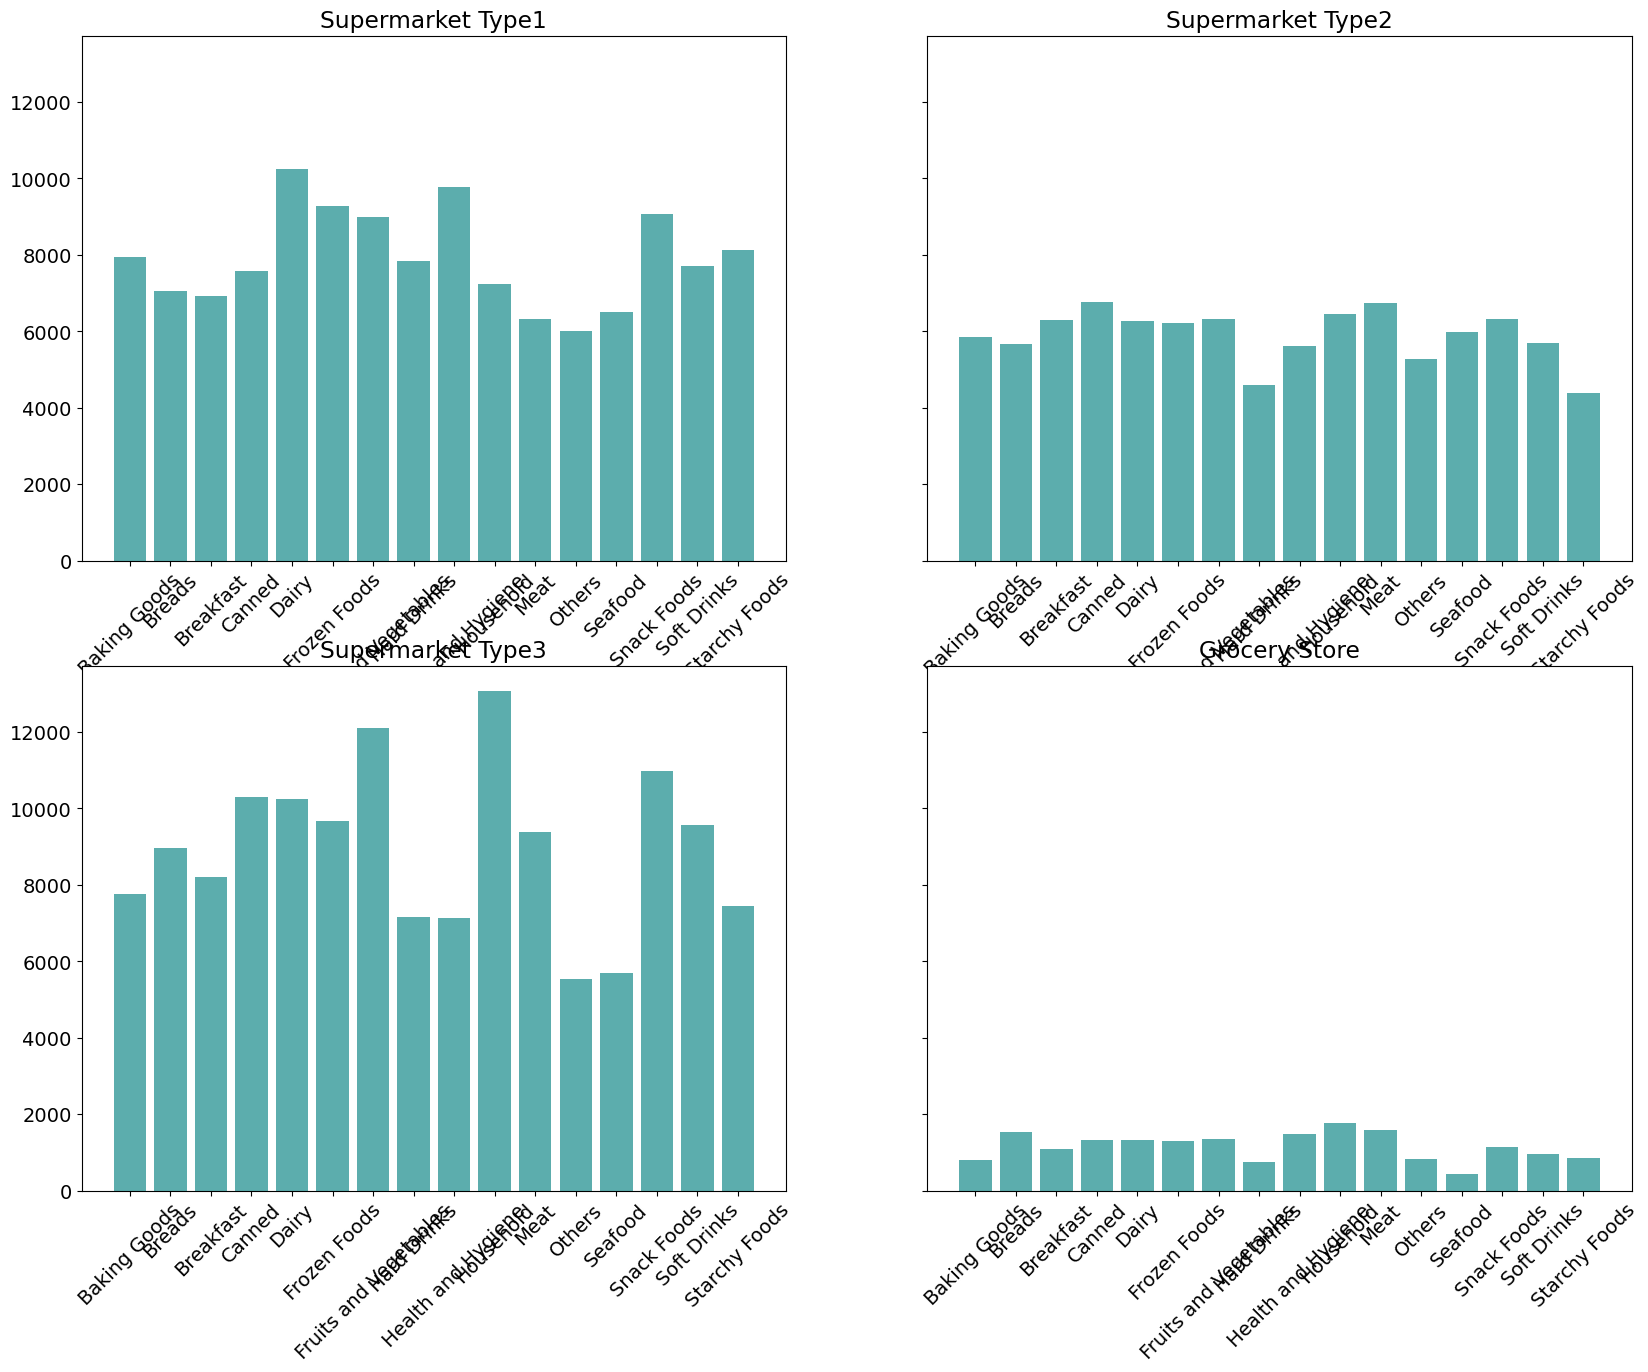

In [38]:
df_sup1 = df[df['Outlet_Type']=="Supermarket Type1"].sort_values("Item_Type")
df_sup2 = df[df['Outlet_Type']=="Supermarket Type2"].sort_values("Item_Type")
df_sup3 = df[df['Outlet_Type']=="Supermarket Type3"].sort_values("Item_Type")
df_grocery = df[df['Outlet_Type']=="Grocery Store"].sort_values("Item_Type")

fig, axs = plt.subplots(2,2,figsize=(20,15), sharey=all)


axs[0,0].bar(df_sup1['Item_Type'],df_sup1['Item_Outlet_Sales'], color='#5CADAD')
axs[0,0].set_title("Supermarket Type1")
axs[0,0].tick_params(axis='x',rotation=45)

axs[0,1].bar(df_sup2['Item_Type'],df_sup2['Item_Outlet_Sales'], color='#5CADAD')
axs[0,1].set_title("Supermarket Type2")
axs[0,1].tick_params(axis='x',rotation=45)

axs[1,0].bar(df_sup3['Item_Type'],df_sup3['Item_Outlet_Sales'], color='#5CADAD')
axs[1,0].set_title("Supermarket Type3")
axs[1,0].tick_params(axis='x',rotation=45)

axs[1,1].bar(df_grocery['Item_Type'],df_grocery['Item_Outlet_Sales'], color='#5CADAD')
axs[1,1].set_title("Grocery Store")
axs[1,1].tick_params(axis='x',rotation=45)

plt.show()

Stores are in each outlet type.

In [39]:
print(df_sup1.Outlet_Identifier.unique())
print(df_sup2.Outlet_Identifier.unique())
print(df_sup3.Outlet_Identifier.unique())
print(df_grocery.Outlet_Identifier.unique())

['OUT045' 'OUT013' 'OUT049' 'OUT017' 'OUT046' 'OUT035']
['OUT018']
['OUT027']
['OUT010' 'OUT019']


Calculate sales value for each outlet type

Supermarket Type 1 :  3441978.2557264897
Supermarket Type 2 :  2979587.358232838
Supermarket Type 3 :  5605149.931989629
Grocery store      :  291163.31381331256


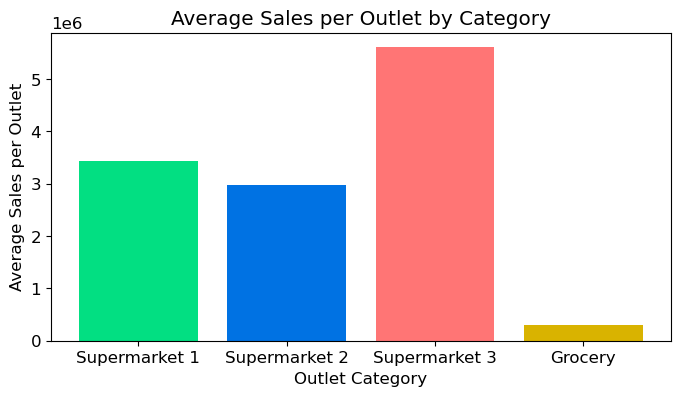

In [40]:
import matplotlib.pyplot as plt

total_salesS1 = df_sup1['Item_Outlet_Sales'].sum()
total_salesS2 = df_sup2['Item_Outlet_Sales'].sum()
total_salesS3 = df_sup3['Item_Outlet_Sales'].sum()
total_salesG = df_grocery['Item_Outlet_Sales'].sum()

ss1 = df_sup1['Outlet_Identifier'].nunique()
ss2 = df_sup2['Outlet_Identifier'].nunique()
ss3 = df_sup3['Outlet_Identifier'].nunique()
sg = df_grocery['Outlet_Identifier'].nunique()

avg_salesS1 = total_salesS1 / ss1
avg_salesS2 = total_salesS2 / ss2
avg_salesS3 = total_salesS3 / ss3
avg_salesG = total_salesG / sg

print("Supermarket Type 1 :  " + str(avg_salesS1))
print("Supermarket Type 2 :  " + str(avg_salesS2))
print("Supermarket Type 3 :  " + str(avg_salesS3))
print("Grocery store      :  " + str(avg_salesG))

categories = ["Supermarket 1", "Supermarket 2", "Supermarket 3", "Grocery"]
values = [avg_salesS1, avg_salesS2, avg_salesS3, avg_salesG]

plt.figure(figsize=(8, 4))
plt.rcParams['font.size'] = 12
colors = ['#02DF82', '#0072E3', '#FF7575', '#D9B300']

plt.bar(categories, values, color=colors)

plt.title('Average Sales per Outlet by Category')
plt.xlabel('Outlet Category')
plt.ylabel('Average Sales per Outlet')

plt.show()

 Prediction

In [41]:
list_1=list(df.columns)

In [42]:
list_1=list(df.columns)
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

        from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in list_cate:
    df[i]=le.fit_transform(df[i])

df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930000,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,2,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,2,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.792854,1,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,2,0.016687,5,96.9726,7,2002,1,1,1,1076.5986
9,990,19.200000,2,0.094450,5,187.8214,2,2007,1,1,1,4710.5350


In [43]:
df_sort = df.sort_values(by=['Outlet_Type', 'Item_Type'])
df_sort

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,259,12.792854,1,0.057557,0,107.6938,4,1985,2,0,0,214.387600
77,682,12.792854,1,0.113720,0,89.9804,4,1985,2,0,0,643.162800
205,371,15.500000,2,0.042465,0,81.5934,0,1998,1,2,0,327.573600
405,1086,12.792854,1,0.065652,0,48.9034,4,1985,2,0,0,48.603400
430,1085,12.792854,1,0.143593,0,37.3164,4,1985,2,0,0,38.616400
...,...,...,...,...,...,...,...,...,...,...,...,...
12904,363,12.792854,2,0.000000,15,238.3538,5,1985,1,2,3,4609.001927
13093,251,12.792854,1,0.017819,15,178.0686,5,1985,1,2,3,4292.347987
13560,422,12.792854,1,0.069282,15,263.5252,5,1985,1,2,3,4049.541362
13854,393,12.792854,1,0.070899,15,128.0020,5,1985,1,2,3,2834.612337


In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [45]:
df_sort = df.sort_values(by=['Outlet_Type', 'Item_Type'])
df_sort

X = pd.get_dummies(df_sort[['Outlet_Type', 'Item_Type', "Item_MRP"]], columns=['Outlet_Type', 'Item_Type', "Item_MRP"])
Y = df_sort['Item_Outlet_Sales']

In [46]:
# Split training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [47]:
# Remove features that do not match between the training set and the test set
extra_FeaturesTrain = set(X_train.columns) - set(X_test.columns)
extra_FeaturesTest = set(X_test.columns) - set(X_train.columns)
X_train = X_train.drop(columns=extra_FeaturesTrain)
X_test = X_test.drop(columns=extra_FeaturesTest)

In [48]:
# Build KNN regressor model
knn_model_3 = KNeighborsRegressor(n_neighbors=5)

In [49]:
knn_model_3.fit(X_train, Y_train)

KNeighborsRegressor()

In [50]:
Y_pred = knn_model_3.predict(X_test)

In [51]:
# Predicted results and actual values
result_df_LocationItemType = pd.concat([pd.Series(Y_test.values, name='Actual'), pd.Series(Y_pred, name='Predicted')], axis=1)
result_df_LocationItemType

,Actual,Predicted
0,2782.870357,3672.419640
1,1860.721890,3404.761510
2,4255.793600,2621.373257
3,4701.879600,2508.009274
4,1262.798398,2035.933001
...,...,...
5677,1930.948098,2978.212672
5678,4769.125400,1812.633435
5679,2320.978800,2453.946314
5680,1449.637215,2174.176900


## Part 3

# Is it true people that are wealther eat healther?

With the rise of the heathy diet, people from upper and middle class starts to purchease the food that has less calories.

Now we have a dataset that has the infromation of the sales of supermartets that are located in 3 different areas

Tier 1 is the store located in city centers. The customers are usually students, people from nearby apartment, and nearby workers. Although They comes from mixed background, usually perfer high calories product 

Tier 2 stores is offen located inside of a residential area. So the customers are very different. We will use those stores as a comparesion with Tier 1 and 2.

Tier 3 is large supermarket in suburbs. Customers are usually from upper and middle class who buys the product that are "healther"

In [52]:
import pandas as pd
import arviz as az
import numpy as np 
from re import search 
import matplotlib.pyplot as plt
import pymc as pm

In [53]:
grocery_df = pd.read_csv("BigMart Product Sales Factors.csv", na_values='NA') #loading the csv dataset 
grocery_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2349.547110
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1892.981544
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4533.564958


# Date Clean

In [54]:
# using the replace() method 
grocery_df.replace(to_replace ="LF",  
                 value = "Low Fat",  
                  inplace = True) 
grocery_df.replace(to_replace ="low fat",  
                 value = "Low Fat",  
                  inplace = True) 
grocery_df.replace(to_replace ="reg",  
                 value = "Regular",  
                  inplace = True) 
  
# writing  the dataframe to another csv file 
grocery_df.to_csv("cleaned_grocery_data.csv",  
                 index = False)

In [55]:
cleaned_grocery_df = pd.read_csv("cleaned_grocery_data.csv", na_values='NA') #loading the csv dataset 
cleaned_grocery_df.dropna(inplace = True)
cleaned_grocery_df.sample(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7228,FDE10,6.67,Regular,0.000000,Snack Foods,133.0626,OUT049,1999,Medium,Tier 1,Supermarket Type1,1573.951200
4587,FDS48,15.15,Low Fat,0.027774,Baking Goods,152.3708,OUT035,2004,Small,Tier 2,Supermarket Type1,3159.886800
12788,NCK30,14.85,Low Fat,0.060979,Household,252.3698,OUT046,1997,Small,Tier 1,Supermarket Type1,3566.457220
12252,FDN12,15.60,Low Fat,0.081089,Baking Goods,110.0544,OUT035,2004,Small,Tier 2,Supermarket Type1,1533.969710
707,NCV05,10.10,Low Fat,0.030209,Health and Hygiene,153.1656,OUT046,1997,Small,Tier 1,Supermarket Type1,1544.656000
...,...,...,...,...,...,...,...,...,...,...,...,...
5035,FDY04,17.70,Regular,0.042649,Frozen Foods,162.7210,OUT018,2009,Medium,Tier 3,Supermarket Type2,978.726000
7482,FDD22,10.00,Low Fat,0.100056,Snack Foods,113.3544,OUT018,2009,Medium,Tier 3,Supermarket Type2,3467.486400
9572,FDG35,21.20,Regular,0.007035,Starchy Foods,175.5738,OUT013,1987,High,Tier 3,Supermarket Type1,2846.571424
7073,FDK46,9.60,Low Fat,0.051677,Snack Foods,258.0620,OUT018,2009,Medium,Tier 3,Supermarket Type2,2856.282000


# Let's compare the sales of low fat and regular fat product!!!

In [56]:
Fat_Content_sum_df = cleaned_grocery_df.pivot_table(index="Item_Fat_Content", 
                               columns="Outlet_Location_Type", 
                               values="Item_Outlet_Sales",
                               aggfunc="sum")
Fat_Content_sum_df.T

Item_Fat_Content,Low Fat,Regular
Outlet_Location_Type,,
Tier 1,4.402376e+06,2.464061e+06
Tier 2,2.325431e+06,1.281814e+06
Tier 3,4.157150e+06,2.241043e+06


<Axes: xlabel='Outlet_Location_Type', ylabel='Sales'>

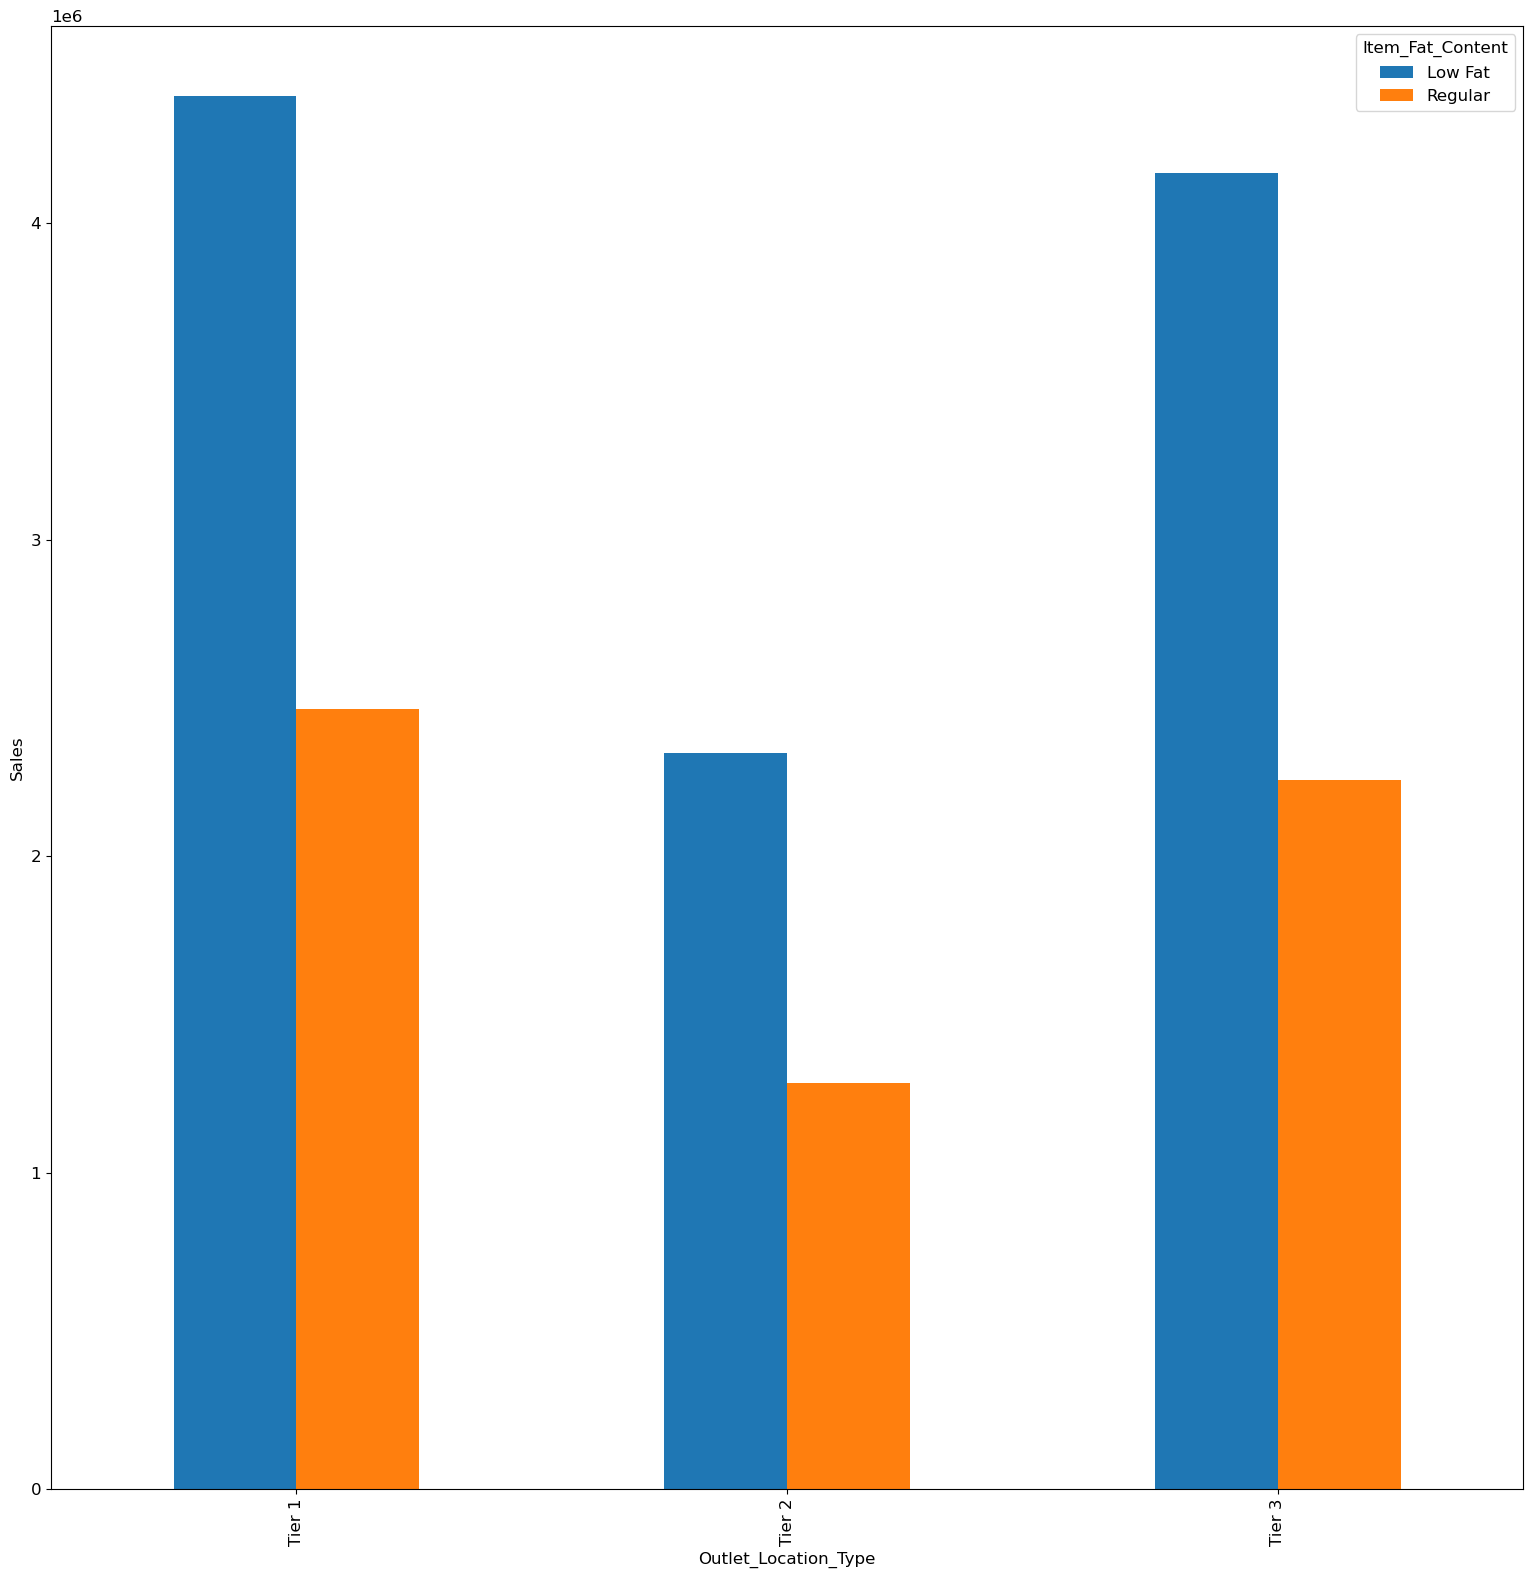

In [57]:
Fat_Content_sum_df.T.plot(kind="bar",
                          ylabel = "Sales")

we can't really tell which store make the most profit in average by compareing the sum of sales.

since the store in tier 1 always make the most profit

so let's just compare the average sales

In [58]:
#fill the table with rows are Item_Fat_Content, columns are Outlet_Location_Type, and values are average of the sales
Fat_Content_mean_df = cleaned_grocery_df.pivot_table(index="Item_Fat_Content", 
                               columns="Outlet_Location_Type", 
                               values="Item_Outlet_Sales",
                               aggfunc="mean")

<Axes: xlabel='Outlet_Location_Type', ylabel='Sales'>

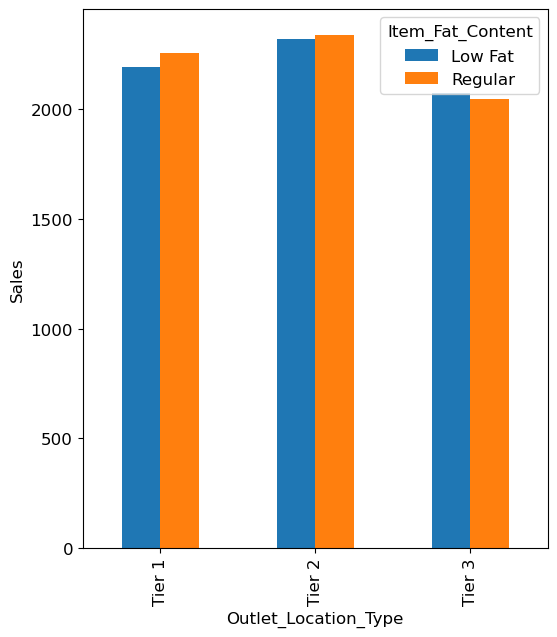

In [59]:
#change the columns and rows for easy comparison
Fat_Content_mean_df.T.plot(kind="bar",
                          ylabel = "Sales",
                          figsize = (6, 7))

In [60]:
Fat_Content_mean_df.T 

Item_Fat_Content,Low Fat,Regular
Outlet_Location_Type,,
Tier 1,2193.510555,2254.401899
Tier 2,2320.789375,2339.076159
Tier 3,2075.461906,2044.747257


Tier 1 customer prefer regular fat product since regular fat product out perform low fat product

Tier 2 is almost idential

Tier 3 customer prefer low fat product.

# We know low fat product in tier 1 and regular fat product does sale better

Now let's compare sale of other products

In [61]:
#Let's create a table with the sum of sales every product
cleaned_grocery_df.pivot_table(index="Item_Type", 
                               values="Item_Outlet_Sales",
                               aggfunc="sum").sort_values("Item_Outlet_Sales", ascending = False)

,Item_Outlet_Sales
Item_Type,
Snack Foods,2.482281e+06
Fruits and Vegetables,2.439699e+06
Household,1.922427e+06
Frozen Foods,1.614202e+06
Dairy,1.374643e+06
Canned,1.273614e+06
Baking Goods,1.171811e+06
Health and Hygiene,9.752602e+05
Meat,8.687794e+05


So the snack food make up the most amount of sales 

now let's the create a table with the average sales

In [62]:
cleaned_grocery_df.pivot_table(index="Item_Type", 
                               values="Item_Outlet_Sales",
                               aggfunc="mean").sort_values("Item_Outlet_Sales", ascending = False)

,Item_Outlet_Sales
Item_Type,
Seafood,2547.844639
Starchy Foods,2347.959080
Household,2283.167300
Breads,2281.806793
Snack Foods,2271.071747
Fruits and Vegetables,2223.973570
Dairy,2217.165411
Meat,2193.887491
Breakfast,2149.229268


Waite a sec! When we compare the sum of the sales, snack food is rank at the top, and 5th at the average of sales

Yet soft drinks always at the last of the table!

People always buy a bag of chips with a soda. There must be something wrong with the soda sale strategy!!!!

let's find out why and help the store!!!

first let's compare the sale of every product in 3 tiers

<Axes: xlabel='Item_Type'>

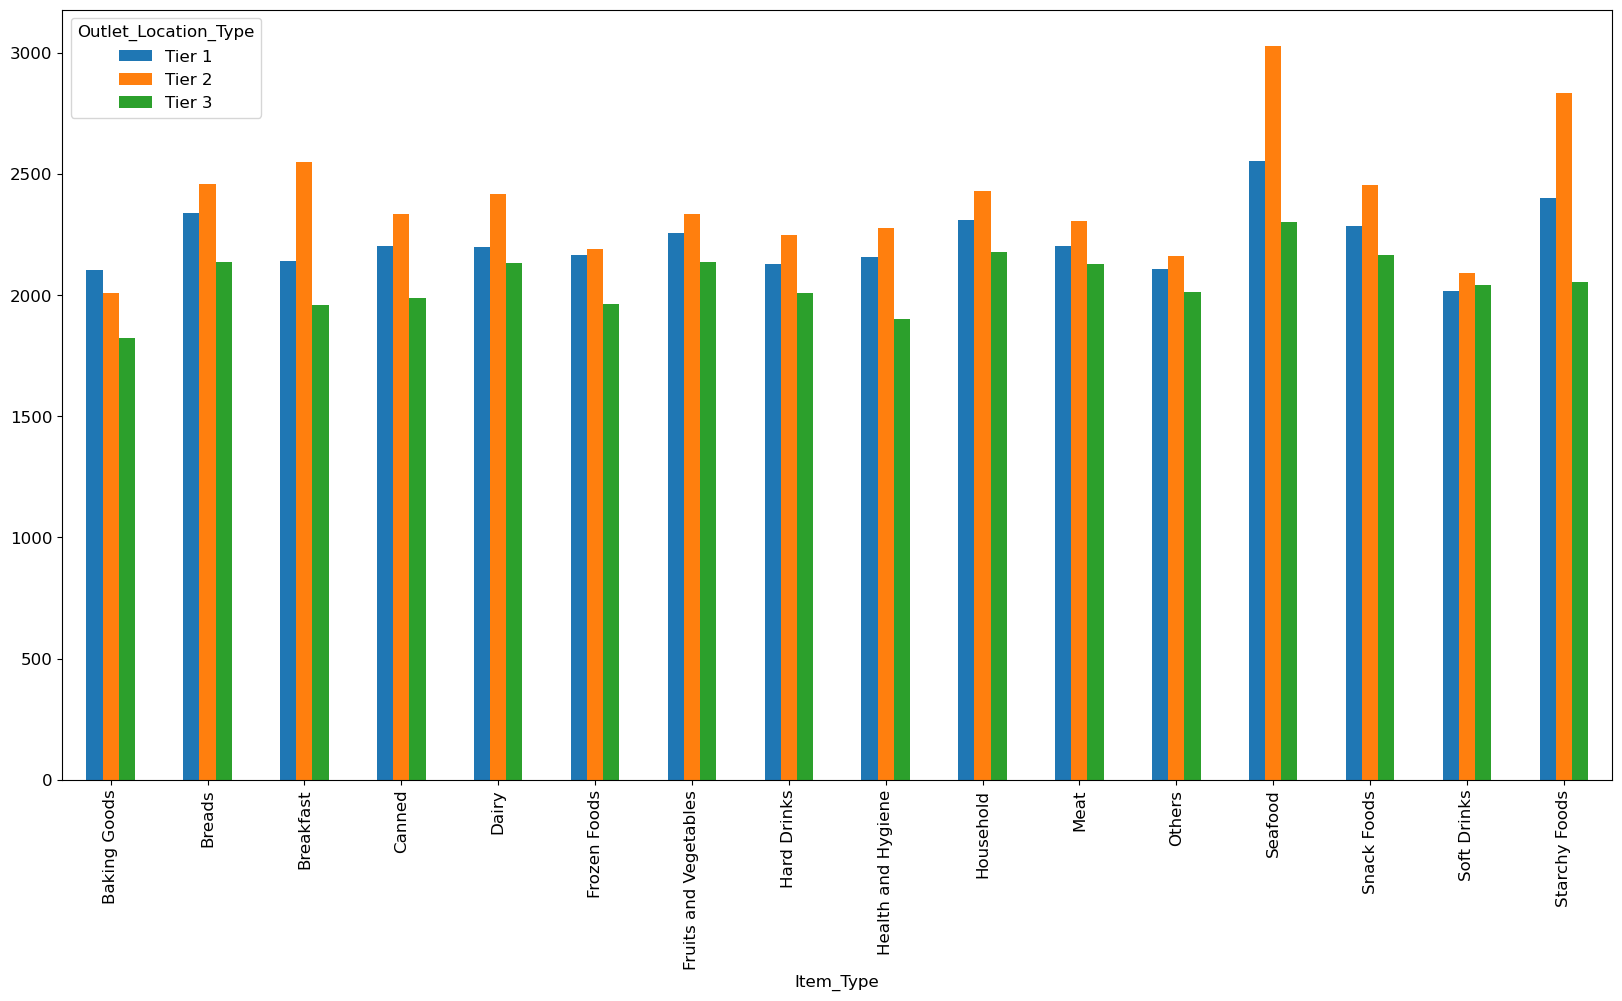

In [63]:
Item_Type_df = cleaned_grocery_df.pivot_table(index="Item_Type", 
                               columns="Outlet_Location_Type", 
                               values="Item_Outlet_Sales",
                               aggfunc="mean")

Item_Type_df.plot(kind="bar",
                 figsize = (20, 10))

Snack food outperform soft drink in tier 2

In contrast to soft drinks, snack food also sales more product in tier 1 than tier 3

maybe soft drinks sales more product in tier 1 because the store has more regular fat product in tier 1 and more low fat product in tier 3? based on what we learned before.

In [64]:
cleaned_grocery_df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1097
Snack Foods              1093
Household                 842
Frozen Foods              773
Dairy                     620
Baking Goods              594
Canned                    594
Health and Hygiene        469
Soft Drinks               399
Meat                      396
Breads                    224
Hard Drinks               198
Starchy Foods             150
Others                    150
Breakfast                 100
Seafood                    50
Name: count, dtype: int64

## Let's do a comparesome of the prediction

In [65]:
#create a new column with the Item_Type and Item_Fat_Content
Item_Type_And_Fat_content = cleaned_grocery_df["Item_Type"]+" "+ cleaned_grocery_df["Item_Fat_Content"]
cleaned_grocery_df["Item_Type_And_Fat_Content"] = Item_Type_And_Fat_content

#pivot the table
compare_df = cleaned_grocery_df.pivot_table(index="Item_Type_And_Fat_Content", 
                               columns="Outlet_Location_Type", 
                               values="Item_Outlet_Sales",
                               aggfunc="mean")

#make a selection
compare_df = compare_df.loc[["Snack Foods Low Fat", 
                "Snack Foods Regular",  
                "Soft Drinks Low Fat",
                "Soft Drinks Regular"], ["Tier 1", "Tier 2", "Tier 3"]]

#show the table
compare_df

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Type_And_Fat_Content,,,
Snack Foods Low Fat,2423.541864,2687.309744,2286.519635
Snack Foods Regular,2096.125306,2144.227032,2006.771024
Soft Drinks Low Fat,2076.649373,2192.687525,2091.150449
Soft Drinks Regular,1669.586130,1526.381217,1751.217153


<Axes: xlabel='Outlet_Location_Type'>

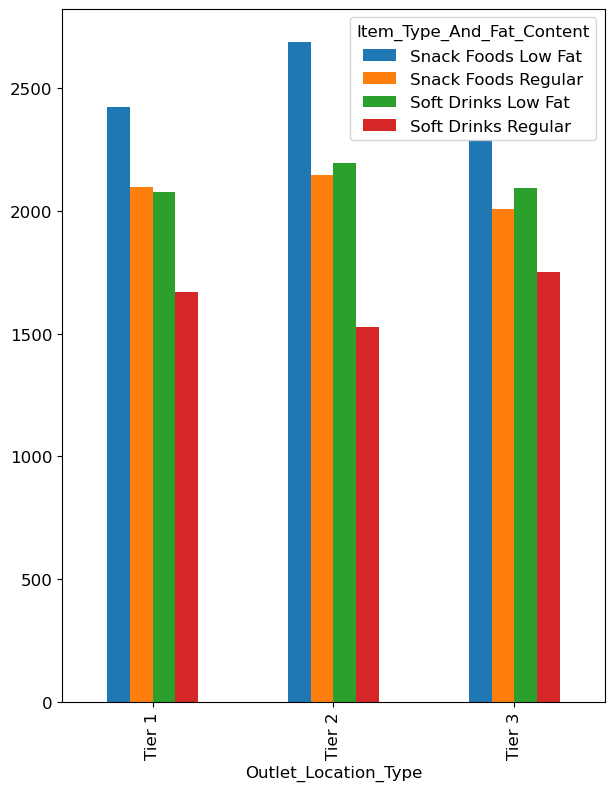

In [66]:
compare_df.T.plot(kind="bar",figsize = (7, 9))

No!!! this is not what we expected

the soft drink regular is more underperform than low fat soft drink, same as snack food

So there must be someother facorts effect sales, let's take other facorts into consideration

In [67]:
#Create a new dataframa with Item_Visibility, Item_MRP, and Item_Outlet_Sales
Store_Compare_models = cleaned_grocery_df.pivot_table(index="Item_Type", 
                                                      values=["Item_Visibility", "Item_MRP", "Item_Outlet_Sales"])
Store_Compare_models

,Item_MRP,Item_Outlet_Sales,Item_Visibility
Item_Type,,,
Baking Goods,127.171078,1972.745379,0.060929
Breads,140.434552,2281.806793,0.065255
Breakfast,136.161940,2149.229268,0.076100
Canned,138.483552,2144.132108,0.061206
Dairy,146.714167,2217.165411,0.064785
Frozen Foods,136.702051,2088.230322,0.061238
Fruits and Vegetables,144.623891,2223.973570,0.062603
Hard Drinks,136.986931,2106.098579,0.059395
Health and Hygiene,133.471390,2079.446074,0.051112


In [68]:
#counts the number of low fat and regular fat products
temp_ftct = cleaned_grocery_df[["Item_Type", "Item_Fat_Content"]].value_counts()

#change the series into dataframe, then add the dataframe into a temporary dataframe
temp_ftct_df = temp_ftct.to_frame().pivot_table(index="Item_Type", 
                                                columns="Item_Fat_Content", 
                                                values = "count")

#merge the Store_Compare_models with the temporary dataframe
Store_Compare_models = pd.merge(Store_Compare_models, temp_ftct_df, left_index = True, right_index = True)

In [69]:
#counts the number of products in Tier 1 2 and 3
temp_outloctype = cleaned_grocery_df[["Item_Type", "Outlet_Location_Type"]].value_counts()

#change the series into dataframe, then add the dataframe into a temporary dataframe
temp_outloctype_df = temp_outloctype.to_frame().pivot_table(index="Item_Type", 
                                                            columns="Outlet_Location_Type", 
                                                            values = "count")

#merge the Store_Compare_models with the temporary dataframe
Store_Compare_models = pd.merge(Store_Compare_models, temp_outloctype_df, left_index = True, right_index = True)

#show the final dataframe
Store_Compare_models 

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Low Fat,Regular,Tier 1,Tier 2,Tier 3
Item_Type,,,,,,,,
Baking Goods,127.171078,1972.745379,0.060929,294.0,300.0,238,118,238
Breads,140.434552,2281.806793,0.065255,120.0,104.0,89,45,90
Breakfast,136.161940,2149.229268,0.076100,35.0,65.0,40,20,40
Canned,138.483552,2144.132108,0.061206,298.0,296.0,239,118,237
Dairy,146.714167,2217.165411,0.064785,379.0,241.0,248,124,248
Frozen Foods,136.702051,2088.230322,0.061238,394.0,379.0,309,155,309
Fruits and Vegetables,144.623891,2223.973570,0.062603,594.0,503.0,439,219,439
Hard Drinks,136.986931,2106.098579,0.059395,198.0,NaN,79,40,79
Health and Hygiene,133.471390,2079.446074,0.051112,469.0,NaN,190,93,186


The table now is just the sum of product number, let's change the sum to percentage, to get a better understanding of the product number with repect to the number of product in every stores

In [70]:
#divide every row by there number
for i in ["Item_MRP","Item_Outlet_Sales", "Item_Visibility", "Low Fat", "Regular", "Tier 1", "Tier 2", "Tier 3"]:
    Store_Compare_models[i] = (Store_Compare_models[i]/ Store_Compare_models[i].sum())
    
Store_Compare_models

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Low Fat,Regular,Tier 1,Tier 2,Tier 3
Item_Type,,,,,,,,
Baking Goods,0.056822,0.056317,0.062475,0.058659,0.109609,0.076774,0.076129,0.076799
Breads,0.062748,0.065140,0.066911,0.023943,0.037998,0.028710,0.029032,0.029042
Breakfast,0.060839,0.061355,0.078031,0.006983,0.023749,0.012903,0.012903,0.012907
Canned,0.061876,0.061210,0.062759,0.059457,0.108148,0.077097,0.076129,0.076476
Dairy,0.065554,0.063295,0.066429,0.075619,0.088053,0.080000,0.080000,0.080026
Frozen Foods,0.061080,0.059614,0.062792,0.078611,0.138473,0.099677,0.100000,0.099710
Fruits and Vegetables,0.064620,0.063489,0.064191,0.118516,0.183778,0.141613,0.141290,0.141659
Hard Drinks,0.061207,0.060124,0.060902,0.039505,NaN,0.025484,0.025806,0.025492
Health and Hygiene,0.059637,0.059363,0.052409,0.093575,NaN,0.061290,0.060000,0.060019


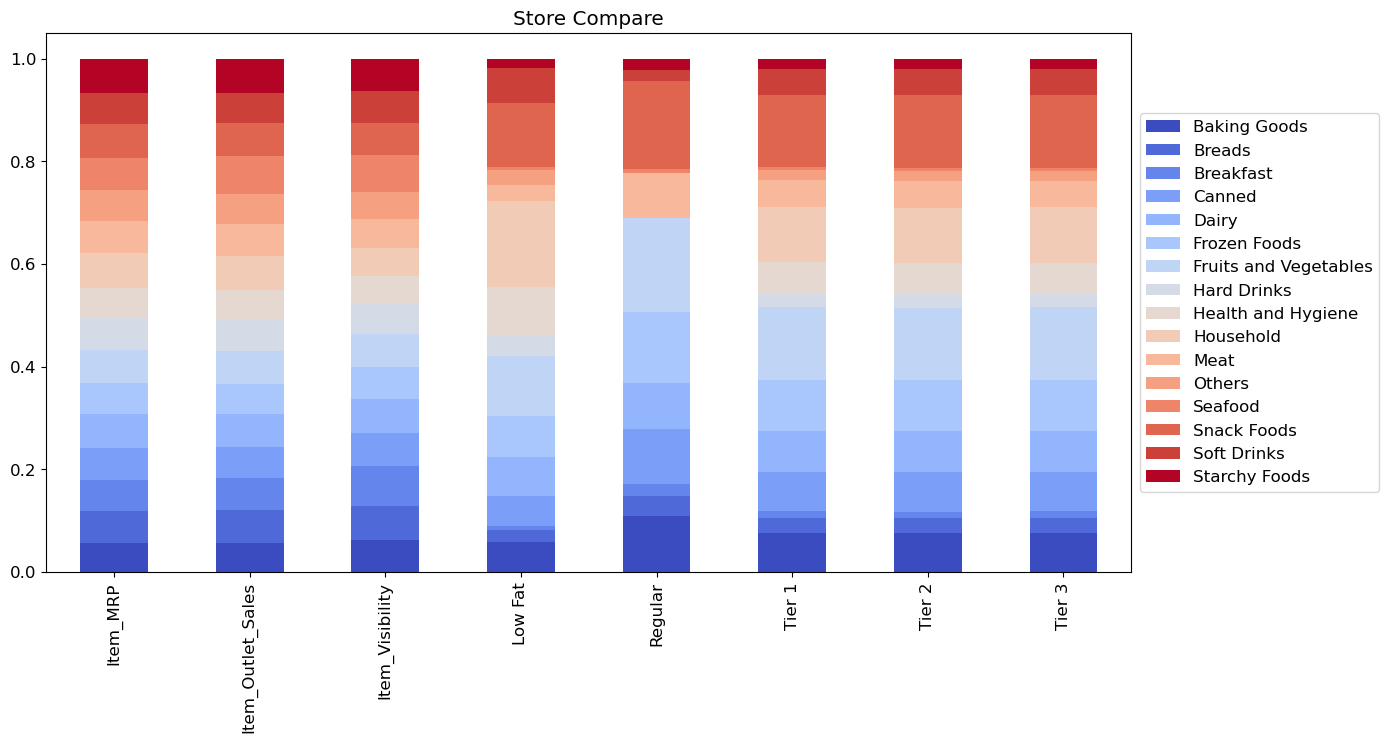

In [71]:
#create a graph
Store_Compare_models.T.plot.bar(
    stacked=True, cmap="coolwarm",
    figsize=(14, 7),
    title="Store Compare",
).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

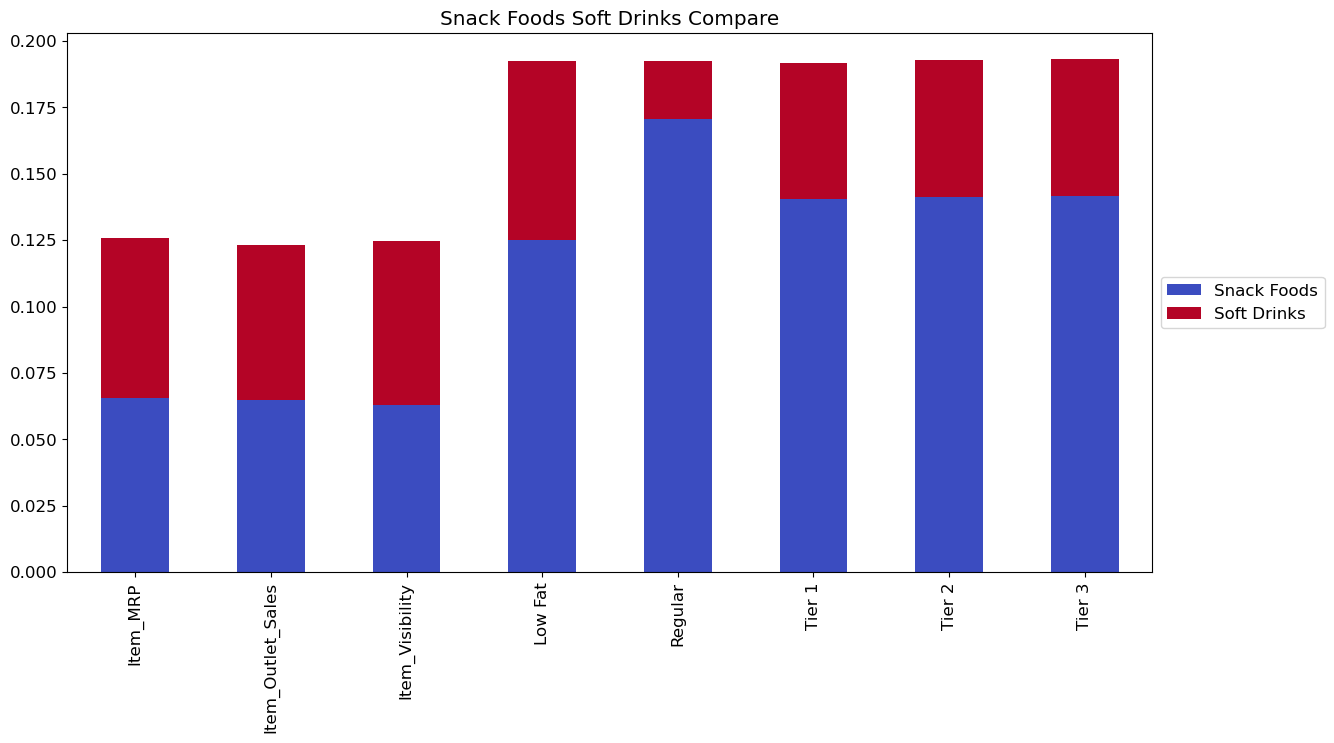

In [72]:
#create a with only Snack Foods and Soft Drinks
SF_SD_Compare_models = Store_Compare_models.loc[["Snack Foods", "Soft Drinks"]]
SF_SD_Compare_models.T.plot.bar(
    stacked=True, cmap="coolwarm",
    figsize=(14, 7),
    title="Snack Foods Soft Drinks Compare",
).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [73]:
Store_Compare_models.loc[["Snack Foods", "Soft Drinks"]]

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Low Fat,Regular,Tier 1,Tier 2,Tier 3
Item_Type,,,,,,,,
Snack Foods,0.065439,0.064834,0.062924,0.124900,0.170625,0.140323,0.141290,0.141659
Soft Drinks,0.060503,0.058259,0.061806,0.067638,0.021922,0.051290,0.051613,0.051630


In [74]:
Store_Compare_models.dropna(inplace=True)

In [75]:
with pm.Model() as Store_Compare_regression_model:
    Item_MRP = pm.Data("Item_MRP", Store_Compare_models["Item_MRP"])
    Item_Outlet_Sales = pm.Data("Item_Outlet_Sales", Store_Compare_models["Item_Outlet_Sales"])
    Item_Visibility = pm.Data("Item_Visibility", Store_Compare_models["Item_Visibility"])
    Low_Fat = pm.Data("Low_Fat", Store_Compare_models["Low Fat"])
    Regular = pm.Data("Regular", Store_Compare_models["Regular"])
    Tier_1 = pm.Data("Tier_1", Store_Compare_models["Tier 1"])
    Tier_2 = pm.Data("Tier_2", Store_Compare_models["Tier 2"])
    Tier_3 = pm.Data("Tier_3", Store_Compare_models["Tier 3"])
    
    # priors
    beta_i = pm.Normal("beta_i", mu=0, sigma=1)
    beta_Item_MRP = pm.Normal("beta_Item_MRP", mu=0, sigma=1)
    beta_Item_Outlet_Sales= pm.Normal("beta_Item_Outlet_Sales", mu=0, sigma=1)
    beta_Item_Visibility = pm.Normal("beta_Item_Visibility", mu=0, sigma=1)
    beta_Low_Fat = pm.Normal("beta_Low_Fat", mu=0, sigma=1)
    beta_Regular = pm.Normal("beta_Regular", mu=0, sigma=1)
    beta_Tier_1 = pm.Normal("beta_Tier_1", mu=0, sigma=1)
    beta_Tier_2 = pm.Normal("beta_Tier_2", mu=0, sigma=1)
    beta_Tier_3 = pm.Normal("beta_Tier_3", mu=0, sigma=1)
    
    # linear model
    mu = beta_i + beta_Item_MRP * Item_MRP + beta_Item_Outlet_Sales * Item_Outlet_Sales + beta_Item_Visibility * Item_Visibility + beta_Low_Fat * Low_Fat + beta_Regular * Regular + beta_Tier_1 * Tier_1 + beta_Tier_2 * Tier_2 +beta_Tier_3 * Tier_3
    p = pm.Deterministic("p", pm.math.invlogit(mu))
    
    # likelihood
    pm.Bernoulli("WL", p=p, observed=Store_Compare_models["Item_Outlet_Sales"])

/Users/seanmacbook/anaconda3/lib/python3.11/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


In [76]:
with Store_Compare_regression_model:
    sdata = pm.sample(1000, tune=2000, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta_i, beta_Item_MRP, beta_Item_Outlet_Sales, beta_Item_Visibility, beta_Low_Fat, beta_Regular, beta_Tier_1, beta_Tier_2, beta_Tier_3]


Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 4 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


In [77]:
az.summary(sdata, round_to=3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_i,-1.790,0.640,-2.988,-0.603,0.014,0.010,2119.779,1482.759,1.001
beta_Item_MRP,-0.100,1.045,-2.091,1.767,0.019,0.024,3000.982,1566.300,1.000
beta_Item_Outlet_Sales,-0.121,1.006,-2.005,1.698,0.020,0.021,2574.390,1634.509,1.001
beta_Item_Visibility,-0.135,0.999,-1.961,1.780,0.020,0.022,2609.281,1524.298,1.004
beta_Low_Fat,-0.063,1.010,-1.942,1.858,0.020,0.023,2560.673,1436.388,0.999
beta_Regular,-0.121,1.035,-2.114,1.689,0.022,0.022,2210.669,1563.904,1.000
beta_Tier_1,-0.088,1.009,-1.809,1.997,0.020,0.023,2556.992,1612.816,1.000
beta_Tier_2,-0.111,1.012,-1.945,1.780,0.021,0.024,2238.944,1221.828,1.001
beta_Tier_3,-0.148,0.998,-2.034,1.781,0.018,0.022,3172.739,1712.328,1.002
p[0],0.152,0.078,0.021,0.289,0.002,0.001,2357.553,1576.446,1.001
